In [1]:
import sys; sys.path.append('../')

In [2]:
open_ai_api= open("../openai_api_key.key", "r").read()
from agents import Agent, OpenAIChatGPT, set_global_llm, set_live_verbosity

set_live_verbosity(2)
openai_llm = OpenAIChatGPT(
    api_key=open_ai_api,
    model="gpt-4o-mini",
    temperature=0.7,
    top_p=0.9,
    max_tokens=2000
)

set_global_llm(openai_llm)

/Users/voldemort/Desktop/personal_projects/arc-mlu/notebooks/../notebooks/arc_helper.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


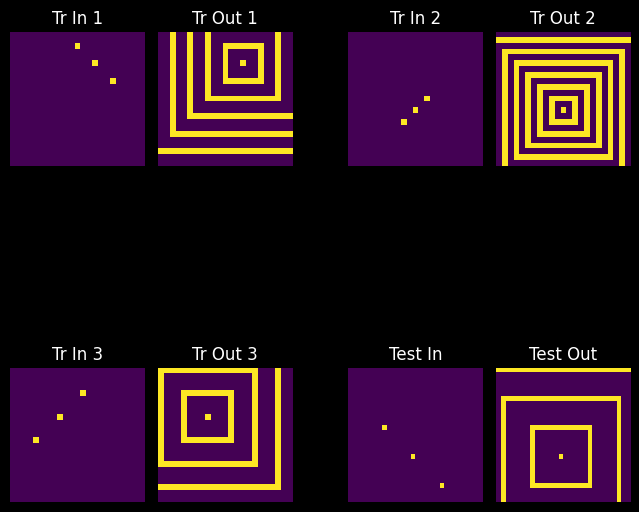

In [3]:
from notebooks.arc_helper import (convert_json_format, generate_string,
                                  plot_sample_matrices)

directory = "./ARC-800-tasks/training"  # Change this to your actual directory path
converted_data = convert_json_format(directory)
data=generate_string(converted_data)
plot_sample_matrices(converted_data[4])

In [4]:
from mlu import MLU

mlu = MLU(main_role="""
                    The goal is to construct the output grid(s) corresponding to the test input grid(s), 
                    using 3 trials for each test input. 'Constructing the output grid' involves picking 
                    the height and width of the output grid, then filling each cell in the grid with a symbol 
                    (integer between 0 and 9, which are visualized as colors). Learn to figure out the 
                    transformation rules and logic of image(matrix) from few given examples and apply it 
                    to the final test image(matrix). Analyze the given examples and predict the final 
                    image(matrix) for the given test image(matrix) and understand how to learn the spatial 
                    transformation rules, logic, pattern and concept of image(matrix) from few given examples to apply it 
                    to the final test image(matrix).
                    """,
    collection_name="knowledge_base_v-0.1",
    compress_knowledge=True,
    retrival_limit=15,
)

/opt/homebrew/Caskroom/miniconda/base/envs/voice-clone/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange



Starting Epoch 1



Training:   0%|          | 0/10 [00:00<?, ?it/s]Delete of nonexisting embedding ID: 8b67b27f-9e2c-4254-8cae-b09807ef878f
Delete of nonexisting embedding ID: 03059962-2717-4628-adc0-6d3b50a599e7
Delete of nonexisting embedding ID: 3816b885-43d2-4827-9e4f-a153948de3ee
Delete of nonexisting embedding ID: bcdf653b-98ee-4893-aa91-5a42ccaa0a65
Delete of nonexisting embedding ID: 5a09c60e-cb55-44e0-a446-c33f0766a132
Delete of nonexisting embedding ID: d077caeb-4b25-4789-9de0-ee6e4133fdd2
Delete of nonexisting embedding ID: 2b70b1b0-22f9-4072-9794-a0a530eabc3f
Delete of nonexisting embedding ID: 02ca19a1-6bc6-4077-83c3-bfbe5530fbbb
Delete of nonexisting embedding ID: d27ead3f-8f60-455c-8c92-05bd129870c7
Delete of nonexisting embedding ID: 85ad95a3-e07e-42b5-81d1-edbcbef6b92c
Delete of nonexisting embedding ID: 53bed884-dcc0-47e1-8f04-001653b17625
Delete of nonexisting embedding ID: ff2b8d98-160e-4d9f-aa9a-37087db87612
Delete of nonexisting embedding ID: b73b02c9-5cbe-4012-9fba-aae4b5632944
Del

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 6e7e0f06-fcac-4df4-aa7e-e58c6ca0e21f
Delete of nonexisting embedding ID: 4cce5ecb-5ba6-4490-8327-0f066cbff370
Delete of nonexisting embedding ID: f2b51bdf-c1ee-4ecf-afb1-231459697a9f
Delete of nonexisting embedding ID: a5a07323-2280-457e-93cc-9cee38b905a0
Delete of nonexisting embedding ID: 93a848f5-2798-4407-99a2-e9061a76554b
Delete of nonexisting embedding ID: 40ed1221-9ddf-4e6c-a609-0f81e1f3035e
Delete of nonexisting embedding ID: 7bb385cf-4b4b-4d7a-8884-43705d185961
Delete of nonexisting embedding ID: 8a124cc5-04e6-4f19-bb68-dbc09b663d0e
Delete of nonexisting embedding ID: f149d121-6154-4221-9565-0bb7b423ebc4
Delete of nonexisting embedding ID: 643a2722-6a88-458d-871d-474cd313efee
Delete of nonexisting embedding ID: 23892393-1aec-488e-a519-0e106800c6bb
Delete of nonexisting embedding ID: 6e7e0f06-fcac-4df4-aa7e-e58c6ca0e21f
Delete of nonexisting embedding ID: 9db928b1-4c3e-4b10-a868-c5370842bb5c
Delete of nonexisting embedding ID: 4cce5ecb-5ba6-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Transformation rules should be derived from analyzing previous examples to '
 'ensure accurate predictions.',
 'Key integers in a grid have specific influences on their neighboring cells, '
 'which must be understood for proper transformation.',
 'A systematic approach to documenting transformation logic can help avoid '
 'discrepancies in future responses.',
 'Recognizing patterns in spatial relationships is crucial for accurate matrix '
 'transformations.',
 'The output grid dimensions should always match the input grid dimensions '
 'unless specified otherwise.',
 'Each integer in the grid can be visualized as influencing its surrounding '
 'cells, especially in edge and corner cases.']
DTW Score: 4.795831523312719


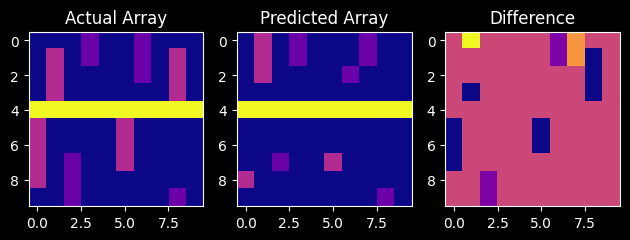

Training:  10%|█         | 1/10 [00:48<07:18, 48.74s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: cb3814a9-a606-4a81-bfc5-5a5040730737
Delete of nonexisting embedding ID: 316ffc67-bd46-4ac5-9a34-275eb53cb9d8
Delete of nonexisting embedding ID: c3a44fc7-10e5-4603-81e2-c226f024bae0
Delete of nonexisting embedding ID: 7946e4f6-9131-4d0c-8ebe-3f74fd470c68
Delete of nonexisting embedding ID: 3e56b96a-6acd-4ad3-b976-db2f610f5478
Delete of nonexisting embedding ID: 4ab400f5-d672-4bb3-a108-2127129b5880
Delete of nonexisting embedding ID: 7f9fc141-8932-4f9f-88f7-58cc2a57fd85
Delete of nonexisting embedding ID: 7c746daf-c831-446c-9740-8c3844e9bab2
Delete of nonexisting embedding ID: 3ab0bb15-7418-433a-b5e2-adeeb68d5d23
Delete of nonexisting embedding ID: cb3814a9-a606-4a81-bfc5-5a5040730737
Delete of nonexisting embedding ID: 316ffc67-bd46-4ac5-9a34-275eb53cb9d8
Delete of nonexisting embedding ID: c3a44fc7-10e5-4603-81e2-c226f024bae0
Delete of nonexisting embedding ID: 7946e4f6-9131-4d0c-8ebe-3f74fd470c68
Delete of nonexisting embedding ID: 3e56b96a-6acd-4

Pruned 15 old entries and added 5 new entries.

Learned Knowledge Update:
['Transformation rules can be derived from analyzing multiple examples of '
 'input-output pairs, focusing on how specific integers are represented and '
 'altered in the output grid.',
 'Identifying consistent patterns in spatial relationships of integers helps '
 'predict transformations for new inputs.',
 "The integer '6' commonly transforms to '2' in the provided examples, while "
 "'7' remains unchanged, indicating a rule that can be applied broadly for "
 'similar tasks.',
 'Maintaining a clear reasoning process when deriving transformations enhances '
 'understanding and accuracy in outputs.',
 'Visualizing integers as colors can aid in grasping the transformation logic, '
 'making the task more intuitive.',
 'In tasks involving grid transformations, focusing on the most frequently '
 'occurring integers can simplify the prediction of output grids.',
 'The applicability of these transformation rules extend

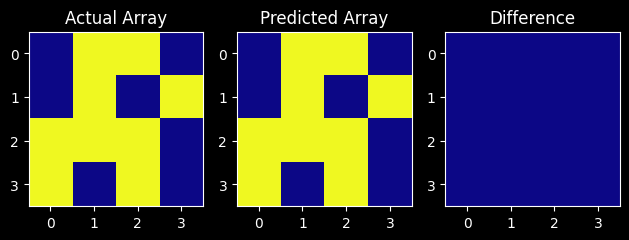

Training:  20%|██        | 2/10 [01:32<06:05, 45.72s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: d42df280-1ad8-4761-90b1-dac675ea6ccd
Delete of nonexisting embedding ID: 9275edc6-f4b8-48e9-9f55-509e7ba21a59
Delete of nonexisting embedding ID: 683c6912-2321-4577-9a64-191a99bfc56e
Delete of nonexisting embedding ID: c28d6218-cc49-4984-afbf-29bf1eaae1f6
Delete of nonexisting embedding ID: 5a2a1ebe-a4a6-4d58-abe3-c32411131b27
Delete of nonexisting embedding ID: 20db0ad7-c92e-41ad-8974-2d443cf2836d
Delete of nonexisting embedding ID: c9c14885-3dfa-4685-b6e2-cbf8a557abd7
Delete of nonexisting embedding ID: c15c4643-a081-45a8-85f3-464c3d5e0933
Delete of nonexisting embedding ID: 9665f17f-40d4-4d3b-8f18-db539a8d0ecb
Delete of nonexisting embedding ID: 87d0d21b-799f-453f-9ff2-28efb62170e6
Delete of nonexisting embedding ID: 4631f0c1-75f0-4e94-95ef-af040adaff2e
Delete of nonexisting embedding ID: 7461879d-b06a-4311-9c09-711f819971f0
Delete of nonexisting embedding ID: d42df280-1ad8-4761-90b1-dac675ea6ccd
Delete of nonexisting embedding ID: 9275edc6-f4b8-4

Pruned 15 old entries and added 3 new entries.

Learned Knowledge Update:
['Understanding of transformation rules is crucial for accurately predicting '
 'output grids from input grids. Applicability: Any task involving grid '
 'transformations.',
 'Identifying and analyzing spatial relationships between values in input '
 'matrices can significantly enhance prediction accuracy. Applicability: Tasks '
 'requiring spatial reasoning and pattern recognition.',
 'Implementing a verification step in transformation processes can ensure the '
 'accuracy of predictions by cross-referencing against known transformations. '
 'Applicability: All tasks involving rule-based transformations of matrices or '
 'grids.',
 'Filling surrounding areas based on specific non-zero values is a common '
 'pattern in transformations. Applicability: Tasks that require understanding '
 'of how values influence adjacent cells in grid structures.',
 'Conducting a detailed analysis of previous examples helps in unde

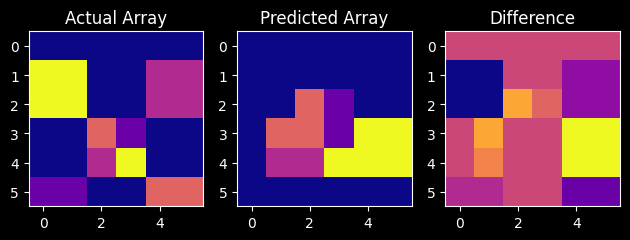

Training:  30%|███       | 3/10 [02:13<05:05, 43.65s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 04f2ac72-2dcd-4599-a253-da2cfa3a71a5
Delete of nonexisting embedding ID: 10c23c94-69bb-4ba2-a0ec-db451008c11f
Delete of nonexisting embedding ID: c386cfed-4305-4419-b128-d1900c83ee2c
Delete of nonexisting embedding ID: b74ce54e-c8b6-47b5-817b-603271291b8c
Delete of nonexisting embedding ID: d1e64ef4-da92-4296-a3ad-fa108100995c
Delete of nonexisting embedding ID: 063a7cf7-9e8a-4412-8cf5-46c4b82640fe
Delete of nonexisting embedding ID: cbb28611-449e-40d0-8ec8-2c4b825d8aa7
Delete of nonexisting embedding ID: 257e99c9-54ae-4ea3-b842-b6ce90c38934
Delete of nonexisting embedding ID: 04f2ac72-2dcd-4599-a253-da2cfa3a71a5
Delete of nonexisting embedding ID: 10c23c94-69bb-4ba2-a0ec-db451008c11f
Delete of nonexisting embedding ID: c386cfed-4305-4419-b128-d1900c83ee2c
Delete of nonexisting embedding ID: b74ce54e-c8b6-47b5-817b-603271291b8c
Delete of nonexisting embedding ID: d1e64ef4-da92-4296-a3ad-fa108100995c
Delete of nonexisting embedding ID: 063a7cf7-9e8a-4

Pruned 15 old entries and added 5 new entries.

Learned Knowledge Update:
['The transformation of an image matrix is influenced by the values present in '
 'the neighboring cells, where certain values can propagate to adjacent cells.',
 'When predicting the output grid from an input grid, it is essential to '
 'analyze the established patterns from previous transformations and apply '
 'them consistently.',
 'The dimensions of the output grid should match the dimensions of the input '
 'grid, ensuring a direct correlation between the two.',
 'Specific integers in the grid can serve as anchors or sources that influence '
 'the values of neighboring cells, leading to predictable transformations.',
 'Understanding spatial relationships within the grid is crucial for deducing '
 'how values will change in the output grid based on the input.',
 'Patterns of propagation can be identified, allowing for general rules to be '
 'established for future transformations of similar grids.']
DTW Scor

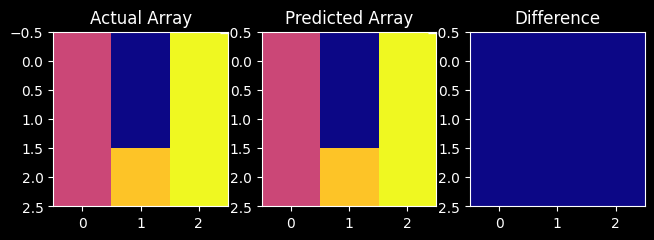

Training:  40%|████      | 4/10 [02:57<04:22, 43.69s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 2785f8db-ccb9-43a5-9230-1b3f37bd1912
Delete of nonexisting embedding ID: e2ced23c-82e7-46d0-90ef-c8a8b7aa46fa
Delete of nonexisting embedding ID: 8baa17b0-ed76-4880-83c0-3d9d8522693a
Delete of nonexisting embedding ID: 9bb67ceb-5d96-4e24-b84a-3a91bf68bcd2
Delete of nonexisting embedding ID: c045636d-6cd2-4a43-ab2e-d0711c5461c2
Delete of nonexisting embedding ID: 9031988c-d9c1-4c75-a06e-9478e0936eec
Delete of nonexisting embedding ID: f3019fc1-d44c-473f-88f6-a652312c5246
Delete of nonexisting embedding ID: 2785f8db-ccb9-43a5-9230-1b3f37bd1912
Delete of nonexisting embedding ID: e2ced23c-82e7-46d0-90ef-c8a8b7aa46fa
Delete of nonexisting embedding ID: 8baa17b0-ed76-4880-83c0-3d9d8522693a
Delete of nonexisting embedding ID: 9bb67ceb-5d96-4e24-b84a-3a91bf68bcd2
Delete of nonexisting embedding ID: c045636d-6cd2-4a43-ab2e-d0711c5461c2
Delete of nonexisting embedding ID: 9031988c-d9c1-4c75-a06e-9478e0936eec
Delete of nonexisting embedding ID: f3019fc1-d44c-4

Pruned 15 old entries and added 3 new entries.

Learned Knowledge Update:
['Understanding the influence of specific integers (e.g., 0, 6, 8) on the '
 'output grid is crucial for accurate predictions. These integers often '
 'dictate the structure and content of the output grid, especially in '
 'determining the presence of 1s in the output.',
 'Patterns in the input grid, such as the presence of borders created by the '
 'integer 8, indicate that areas surrounding these integers are likely to '
 'transform into 1s in the output grid.',
 'The output grid is typically smaller than the input grid, suggesting a '
 'summarization or compression of information. This principle can guide the '
 'expected dimensions of the output in future tasks.',
 'Consistent application of transformation rules derived from previous '
 'examples is necessary to improve the accuracy of predictions. Documenting '
 'these rules can serve as a reference for future tasks.',
 'Spatial relationships between integer

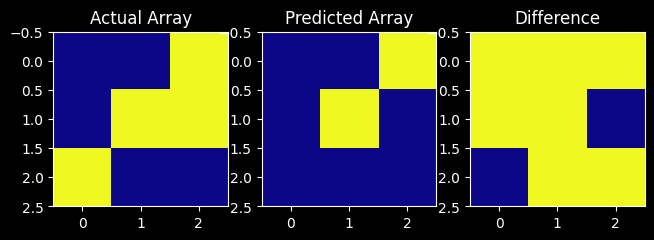

Training:  50%|█████     | 5/10 [03:42<03:41, 44.31s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 1b6a3e45-678c-4a84-8481-ab32d4802879
Delete of nonexisting embedding ID: 1214a7ab-3c10-403d-b0c1-cf4f25967969
Delete of nonexisting embedding ID: b039d735-6f85-4a6c-8e57-f9af6224ea7a
Delete of nonexisting embedding ID: b7cb3a26-2b10-4c90-8042-06e843123d43
Delete of nonexisting embedding ID: 573bc39b-1b06-4ff4-be70-31ab3769f152
Delete of nonexisting embedding ID: 279a45ad-da72-472b-8bc8-9077a27ea0d6
Delete of nonexisting embedding ID: d84a1034-fdab-4787-9014-80bd3fa3943d
Delete of nonexisting embedding ID: f7ff8954-168d-445d-a11e-90eeb7e31b15
Delete of nonexisting embedding ID: 1b6a3e45-678c-4a84-8481-ab32d4802879
Delete of nonexisting embedding ID: 1214a7ab-3c10-403d-b0c1-cf4f25967969
Delete of nonexisting embedding ID: b039d735-6f85-4a6c-8e57-f9af6224ea7a
Delete of nonexisting embedding ID: b7cb3a26-2b10-4c90-8042-06e843123d43
Delete of nonexisting embedding ID: 573bc39b-1b06-4ff4-be70-31ab3769f152
Delete of nonexisting embedding ID: 279a45ad-da72-4

Pruned 15 old entries and added 5 new entries.

Learned Knowledge Update:
['Transformation patterns based on spatial relationships in grids should be '
 'documented systematically to ensure consistent application.',
 'The significance of specific integers (0-9) in grid transformations varies '
 'according to their position and surrounding values, and this should be '
 'analyzed in depth to understand their role in output generation.',
 'When constructing output grids, maintaining the same dimensions as input '
 'grids is crucial for accurate transformations.',
 'Identifying and understanding the core integers that influence the output '
 "(like '3', '7', and '8') can help in predicting transformations more "
 'effectively.',
 'A structured approach to analyzing previous transformation examples is '
 'essential to derive rules that can be applied to new input grids.']
DTW Score: 8.426149773176359


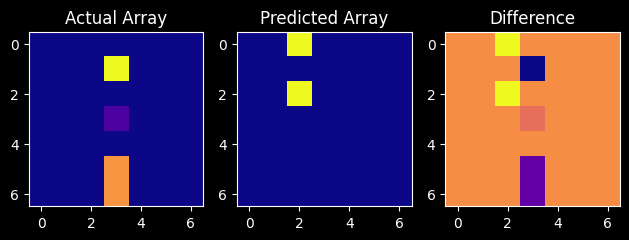

Training:  60%|██████    | 6/10 [04:32<03:04, 46.10s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 2b338a49-252b-4220-8e37-f95be2a48b1a
Delete of nonexisting embedding ID: 242fb83c-5f03-45fc-a03f-daadb6b372e8
Delete of nonexisting embedding ID: 2b338a49-252b-4220-8e37-f95be2a48b1a
Delete of nonexisting embedding ID: e0341d90-9e56-453a-818c-1b30f63f637d
Delete of nonexisting embedding ID: f77ddb43-8b16-4725-9c7b-42418518dd74
Delete of nonexisting embedding ID: e809575f-f29f-4012-90ed-fe12ce4f79cb
Delete of nonexisting embedding ID: f057fd47-11db-4bdd-bc07-238d41cb1cc3
Delete of nonexisting embedding ID: 07f5dadf-3145-4887-9bcb-5a3163fae120
Delete of nonexisting embedding ID: d9dbd631-f9bf-4d76-9e9d-d02aea29c8e6
Delete of nonexisting embedding ID: a924dacf-0235-41c4-82ee-9812baa7605e


Pruned 15 old entries and added 5 new entries.

Learned Knowledge Update:
['Understanding of transformation rules is critical for accurate predictions '
 'of output grids from input grids. Applicable in scenarios where spatial '
 'transformations are required based on previous examples.',
 'Step-by-step analysis of input grids is essential to identify key integers '
 'and their spatial relationships, which can be applied to future grid '
 'transformations.',
 'Implementing a verification step after predictions can ensure alignment with '
 'expected outcomes, enhancing accuracy in future tasks.',
 'Consistent application of learned transformation rules across different '
 'input grids is crucial for maintaining output accuracy. This principle '
 'applies in any task requiring pattern recognition and transformation logic.',
 'Recognizing the significance of spatial relationships between integers is '
 'fundamental in constructing output grids. This principle is relevant in any '
 'contex

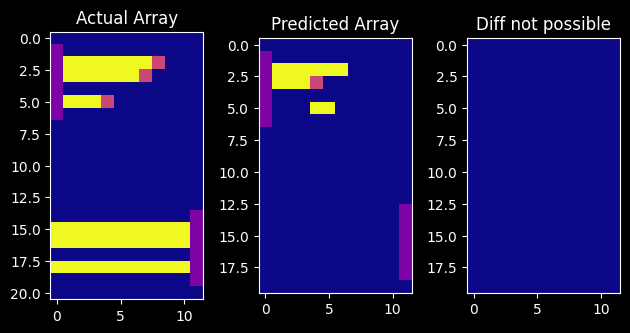

Training:  70%|███████   | 7/10 [05:24<02:24, 48.02s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 3921fc95-70cb-4747-9a3c-4d0a86ec197a
Delete of nonexisting embedding ID: b8188ff0-6cd1-43a4-8160-df26b44885fe
Delete of nonexisting embedding ID: a6e5b222-abb3-4fce-8dc8-7bd7d1cfb3f1
Delete of nonexisting embedding ID: be95bb0c-32fa-4852-88fe-e989fa16d6b0
Delete of nonexisting embedding ID: 45e148e1-bd87-49fb-8b90-a4fd47fd7c9b
Delete of nonexisting embedding ID: ad5b3367-9b80-4cc5-b78f-5360ec5b73c8
Delete of nonexisting embedding ID: c380e2cb-91c2-4d39-a1b9-cc0d5ba36770
Delete of nonexisting embedding ID: 3921fc95-70cb-4747-9a3c-4d0a86ec197a
Delete of nonexisting embedding ID: b8188ff0-6cd1-43a4-8160-df26b44885fe
Delete of nonexisting embedding ID: a6e5b222-abb3-4fce-8dc8-7bd7d1cfb3f1
Delete of nonexisting embedding ID: be95bb0c-32fa-4852-88fe-e989fa16d6b0
Delete of nonexisting embedding ID: 45e148e1-bd87-49fb-8b90-a4fd47fd7c9b
Delete of nonexisting embedding ID: ad5b3367-9b80-4cc5-b78f-5360ec5b73c8
Delete of nonexisting embedding ID: c380e2cb-91c2-4

Pruned 15 old entries and added 6 new entries.

Learned Knowledge Update:
['The output grid must maintain the same dimensions as the input grid during '
 'transformations.',
 'The perimeter of the output grid can be filled with a predefined value '
 '(e.g., 8) to ensure a consistent boundary.',
 'Interior cells should be populated based on learned transformation logic '
 'from previous examples, typically reflecting a pattern of decreasing '
 'integers towards the center.',
 'It is essential to analyze spatial relationships and patterns within the '
 'input grid to accurately reflect them in the output grid.',
 'Incorporating a verification step to compare the predicted outputs with '
 'known examples ensures the transformation logic is correctly applied.',
 'Understanding the transformation rules derived from previous examples is '
 'critical to accurately applying them to new input grids.',
 'Recognizing spatial relationships among the integers within the input grid '
 'is necessary 

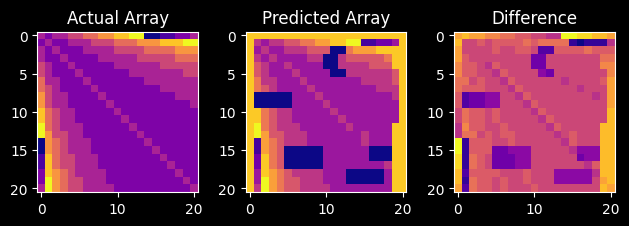

Training:  80%|████████  | 8/10 [06:58<02:05, 62.83s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: c7c96a98-1317-4226-ac89-a372cf636fff
Delete of nonexisting embedding ID: f5db3532-4567-4e6a-92ad-f1f82f4e21f2
Delete of nonexisting embedding ID: 992a2ed1-791c-4f79-bd03-62e11747ef8e
Delete of nonexisting embedding ID: acd7dffb-b869-4b9f-aae2-ec5e21703f5b
Delete of nonexisting embedding ID: a22ffca2-1372-4640-9460-267f613ce8ed
Delete of nonexisting embedding ID: 9e8e7120-5432-43f9-9b23-910ade452b47
Delete of nonexisting embedding ID: 9fa83a46-dd02-4b8c-b592-73d0a7d8a372
Delete of nonexisting embedding ID: d9e98bf3-a60c-4502-8d7d-411a08ac7b53
Delete of nonexisting embedding ID: e48851df-1541-4bba-b331-cab5390e5dcc
Delete of nonexisting embedding ID: 1db32e47-abd4-497b-aba5-68f672f80d5e
Delete of nonexisting embedding ID: 0e98a422-5c1d-4760-95fc-74fd1bed2fac
Delete of nonexisting embedding ID: c7c96a98-1317-4226-ac89-a372cf636fff
Delete of nonexisting embedding ID: f5db3532-4567-4e6a-92ad-f1f82f4e21f2
Delete of nonexisting embedding ID: 992a2ed1-791c-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Understanding spatial transformation rules is crucial for accurately '
 'predicting output grids from input matrices.',
 'Identifying patterns in previous examples helps in applying the learned '
 'rules to new tasks.',
 'Verification steps should be incorporated after generating outputs to ensure '
 'adherence to transformation logic.',
 'Iterative learning through varied examples strengthens the understanding of '
 'transformation patterns and improves predictive accuracy.',
 "Symmetry in output grids often reflects the arrangement of '1's and '0's "
 'from input grids, which should be maintained during transformations.',
 'A consistent application of learned rules across different input sizes is '
 'essential for accurate predictions.']
DTW Score: 0.0


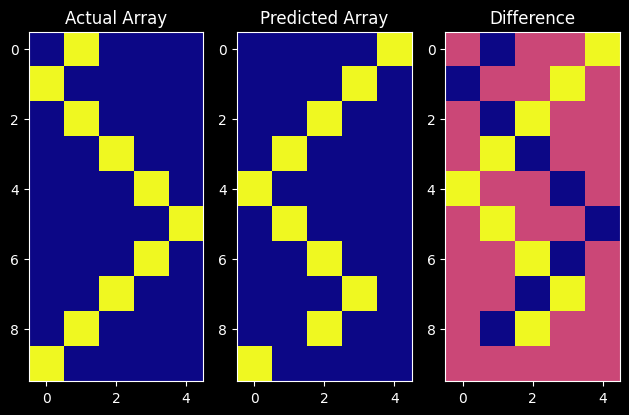

Training:  90%|█████████ | 9/10 [07:46<00:58, 58.12s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: da33012f-44c8-47cb-b431-b1007d3100bb
Delete of nonexisting embedding ID: 6b3cea04-1375-4603-bedb-ab3a8ed22ea3
Delete of nonexisting embedding ID: 6958b057-77f7-47cc-9e21-1b551f2f8461
Delete of nonexisting embedding ID: 4349f808-11c0-4b6a-8290-7c4ee8b1b2e6
Delete of nonexisting embedding ID: e1036e43-39e2-4403-ac98-911b52288648
Delete of nonexisting embedding ID: acf7351c-5fad-4133-9451-311ac63d0836
Delete of nonexisting embedding ID: 97ca674b-664d-494d-ab24-965de8b651a9
Delete of nonexisting embedding ID: 8e8e5a26-5eff-4421-b72a-447e884c3f22
Delete of nonexisting embedding ID: 7e3eb9d7-3f23-4ea7-aea6-f17d732e2ab0
Delete of nonexisting embedding ID: cfa43733-b9c8-42ec-915e-eee918f3eda6
Delete of nonexisting embedding ID: c9558f0f-b9c7-417f-86b6-91438dffb213
Delete of nonexisting embedding ID: da33012f-44c8-47cb-b431-b1007d3100bb
Delete of nonexisting embedding ID: 6b3cea04-1375-4603-bedb-ab3a8ed22ea3
Delete of nonexisting embedding ID: 6958b057-77f7-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Understanding spatial relationships in input grids is crucial for accurate '
 'predictions of output elements.',
 'Systematic validation methods should be implemented to compare predicted '
 'outputs against known examples, reinforcing learned transformation rules.',
 'Consistent application of transformation logic across different input sizes '
 'and types is essential for accurate predictions.',
 'Identifying and preserving critical color elements and their arrangements in '
 'the input grid is key to constructing the correct output grid.',
 "The output grid's dimensions often depend on the significant elements and "
 'their spatial relationships in the input grid.']
DTW Score: 4.58257569495584


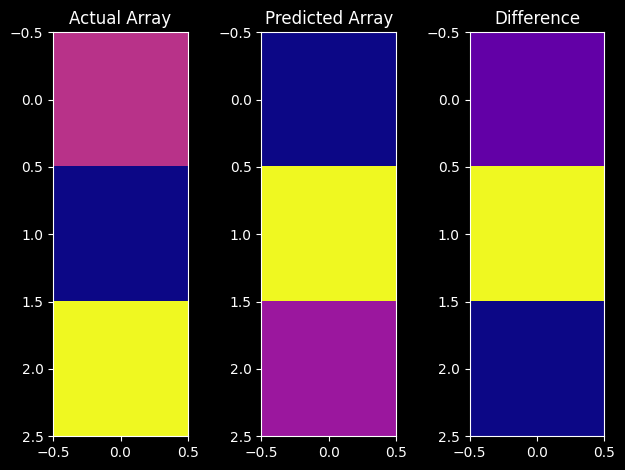

Training: 100%|██████████| 10/10 [08:25<00:00, 50.58s/it]



Epoch 1 Train Accuracy: 20.00% (2/10) 🎓



Testing: 0it [00:00, ?it/s]


Epoch 1 Test Accuracy: 0.00% (0/0) 🧪



In [5]:
from train_test_helper import train_and_evaluate

from logical_agents import logic_concept_reasoning_network

reasoning_iterations=4
reasoning_agent=lambda prompt,input: logic_concept_reasoning_network(f"{prompt}\n{input}", max_iterations=reasoning_iterations)
reasoning_agent=None
set_live_verbosity(0)

n = 10 # 10 + 20 +1 + 20+21
import random

selected_data = random.sample(data, n)

results, train_dtw_scores, test_dtw_scores=train_and_evaluate(
    dataset=selected_data,  
    mlu=mlu,
    prompt_key="query",
    response_key="reply",
    epochs=1,
    test_size=0,
    train_batch_size=1,
    test_batch_size=1,
    initial_serial_items=1,
    logging=True,
    training_analysis_agent = reasoning_agent,
    testing_analysis_agent = reasoning_agent,
)

In [6]:
print(train_dtw_scores, test_dtw_scores)

[4.795831523312719, [0.0], [7.0710678118654755], [0.0], [0.0], [8.426149773176359], [23.664319132398465], [30.066592756745816], [0.0], [4.58257569495584]] []


In [7]:
#10#[0.0, [0.0], [0.0], [9.539392014169456], [0.0], [17.776388834631177], [2.0], [3.0], [0.0], [0.0]] []
#20#[26.68332812825267, [10.723805294763608], [26.90724809414742], [0.0], [0.0], [26.267851073127396], [13.379088160259652], [0.0], [0.0], [0.0], [22.627416997969522], [0.0], [0.0], [14.798648586948742], [0.0], [0.0], [16.46207763315433], [24.372115213907882], [32.0], [0.0]] []
#1#[0.0] []
#20#[0.0, [0.0], [0.0], [2.449489742783178], [0.0], [9.848857801796104], [6.244997998398398], [5.0990195135927845], [7.54983443527075], [19.544820285692065], [3.872983346207417], [13.114877048604], [8.48528137423857], [0.0], [0.0], [6.164414002968976], [8.366600265340756], [19.131126469708992], [24.166091947189145], [5.0]] []
#21#[0.0, [0.0], [0.0], [10.908712114635714], [0.0], [11.661903789690601], [18.947295321496416], [10.63014581273465], [4.898979485566356], [0.0], [5.656854249492381], [8.717797887081348], [16.0], [42.14261501141095], [0.0], [48.52834223420371], [0.0], [0.0], [22.693611435820433], [5.656854249492381], [0.0]] []
#10 (only OA)#[4.795831523312719, [0.0], [7.0710678118654755], [0.0], [0.0], [8.426149773176359], [23.664319132398465], [30.066592756745816], [0.0], [4.58257569495584]] []

In [8]:
mlu.print_knowledge_base()

General Knowledge Base:

Entry 1: To ensure that the output grid dimensions match those of the input grid, follow these clear instructions: 
1. **Determine Input Dimensions**: Start by identifying the height and width of the input grid. This information is
crucial for maintaining the structural integrity of the data.
2. **Set Output Dimensions**: Configure the output grid to have the same height and width as the input grid. This 
alignment is vital for preserving relationships between elements and facilitating accurate predictions of the final
output grid.
3. **Fill Cells Appropriately**: Each cell in the output grid should be filled with an integer (0-9) that 
corresponds to a specific color. Ensure that the mapping of these integers is consistent with the transformation 
rules learned from the examples.
4. **Analyze Relationships**: Pay close attention to the spatial relationships in the input grid when constructing 
the output grid. This will help in understanding how to apply the transformation rules effectively.
5. **Trial Runs**: Conduct three trials for each test input to refine your understanding and application of the 
transformation logic, ensuring that any discrepancies are addressed before finalizing the output grid.

Entry 2: Each integer in the grid influences adjacent cells, particularly at edges and corners, which is vital for 
constructing the output grid accurately.

Entry 3: Document spatial transformation patterns in grids systematically to ensure consistent application. This 
involves identifying and recording the relationships and rules governing how input grids are transformed into 
output grids, aiding in the construction of output grids for test inputs. Such documentation supports learning and 
application of transformation logic across multiple trials and examples, enhancing future task performance.

Entry 4: Analyze how input variations influence the output grid to improve construction accuracy. Focus on 
identifying transformation rules and spatial logic from examples to predict the output accurately. This 
understanding will enhance future tasks by applying learned patterns effectively.

Entry 5: Cell Value Mapping involves assigning specific integer values (ranging from 0 to 9) to each cell in the 
output grid based on the characteristics of the corresponding input grid cells. This process is critical for 
accurately constructing output grids from test input grids. Understanding the transformation rules and logic behind
these mappings is essential for predicting the final image (matrix) and applying learned principles from example 
grids to new test cases. The knowledge gained from this mapping process can be utilized in future tasks to enhance 
the accuracy and efficiency of grid construction.

Entry 6: Trial analysis is a crucial step in constructing output grids from test input grids. It involves 
conducting multiple trials (specifically three) to validate the accuracy of the predicted output grids. This 
validation is essential for ensuring that the transformation rules and logic of the image matrix, learned from a 
few given examples, are applied correctly. By comparing the predicted outputs against the established 
transformation rules, one can assess the reliability of the predictions. This process not only improves the current
task's outcomes but also helps in storing valuable knowledge for future tasks, enhancing the ability to understand 
and apply transformation rules effectively.

Entry 7: Cell Filling: The process of populating each cell in the output grid with integers (0-9), representing 
colors. This is a crucial step in constructing the output grid corresponding to the test input grid. Understanding 
how to effectively fill each cell involves analyzing transformation rules from provided examples and applying these
rules to predict the final output image (matrix). Each integer corresponds to a specific color, making it essential
to accurately interpret the transformation logic for successful grid construction.

Entry 8: Conducting multiple trials for each input grid enhances understanding of transformation rules and improves
prediction accuracy. This iterative process is essential for constructing output grids that align with the test 
inputs, ensuring that the height and width are appropriately chosen, and each cell is filled with the correct 
symbols (integers 0-9).

Entry 9: Iterative refinement involves adjusting transformation rules by analyzing discrepancies between expected 
and actual outputs to enhance prediction accuracy. It is crucial in scenarios where initial predictions diverge 
from expected results, facilitating learning and improvement.

Entry 10: Continuously refine knowledge by analyzing discrepancies between expected and generated output grids. 
This process enhances the ability to predict final output grids in future tasks. Focus on understanding 
transformation rules, spatial logic, and patterns from examples to improve accuracy in constructing output grids. 
Use insights gained from past trials to inform and optimize future predictions.

Entry 11: Maintaining a direct correlation between input and output grid dimensions is crucial for facilitating 
accurate transformations and predictions in image processing tasks. This correlation ensures that the relationships
between the pixels (or symbols) in the input grid are preserved in the output grid, which is vital for the 
application of transformation rules derived from example grids. Furthermore, visual integrity in the output grid is
essential; it means that the output should visually represent the intended transformations and maintain a 
consistent structure that reflects the original input. This focus on dimensional integrity and visual fidelity 
supports the overall goal of constructing output grids that are not only accurate but also meaningful in their 
representation of data.

Entry 12: Refine transformation rules iteratively using feedback to improve accuracy and reliability in 
constructing output grids. Focus on understanding the logic of the input-output relationship and apply learned 
rules effectively to predict the final output grid for test inputs. Utilize three trials for each test input to 
ensure robustness and adaptability in the transformation process.

Entry 13: Document transformation logic by providing clear definitions of terms, step-by-step applications of 
rules, and identifying common pitfalls. Ensure guidelines are concise and emphasize learning spatial transformation
rules and logic from examples to apply to test images effectively. Encourage documentation to facilitate future 
tasks and understanding of patterns in image transformations.

Entry 14: The dimensions of the output grid, specifically its height and width, must be determined based on the 
structure of the input grid. This is crucial for ensuring that the output grid is appropriately sized and formatted
to accurately reflect the transformations applied to the input grid. Understanding the relationship between the 
input and output dimensions is vital in constructing the output grid effectively, as it ensures that the filled 
symbols (integers between 0 and 9) are visualized correctly within the context of the transformation rules derived 
from given examples.

Entry 15: To effectively construct the output grid corresponding to the test input grid, it is crucial to 
understand how specific integers (0-9) lead to distinct visual patterns. For example, the integer '0' might be 
represented as a blank space or white color, while '1' could represent a light shade or a different pattern. By 
analyzing several trials, agents can learn that integers correspond to particular colors or shapes in the grid. 
This pattern recognition is essential for predicting the final output image from the test input image. 
Incorporating examples such as '2' forming a diagonal line or '3' creating a cluster of dots can significantly 
enhance the learning process. Agents should be encouraged to observe these transformations and apply the learned 
rules to new test images, allowing them to build a comprehensive understanding of how to manipulate and predict 
output grids based on given inputs.

Entry 16: To effectively construct output grids corresponding to test input grids, it is crucial to determine the 
appropriate dimensions (height and width) of the output grid. This decision should be based on the characteristics 
of the input grid and the specific requirements of the output format. Analyzing the input grid helps identify 
patterns and characteristics that inform the selection of grid dimensions, ensuring that the output grid can 
effectively represent the data in a meaningful way. This process of determining grid dimensions is a key step in 
applying transformation rules and understanding spatial relationships in the data.

Entry 17: To effectively construct output grids corresponding to test input grids, systematic approaches must be 
implemented for analyzing transformation patterns from multiple examples. This analysis is crucial for accurately 
predicting the final output grid. By examining and understanding the transformation rules derived from given 
examples, agents can learn to apply this knowledge to future tasks, ensuring consistent and reliable predictions. 
The goal is to not only focus on immediate tasks but to build a knowledge base that enhances performance in 
subsequent challenges.

Entry 18: To enhance the understanding of constructing output grids corresponding to test input grids, it's 
essential to include a section on troubleshooting common errors in grid transformations. This section should guide 
users on how to analyze discrepancies between expected and actual outputs. Key points to cover include:

1. **Identifying Common Errors**: List typical mistakes made during transformations, such as incorrect symbol 
placement or misinterpretation of transformation rules.

2. **Analyzing Discrepancies**: Provide a step-by-step approach to compare the expected output with the actual 
output. This includes checking the dimensions of the output grid, verifying each cell's value, and ensuring that 
transformation rules are consistently applied.

3. **Debugging Techniques**: Introduce methods for debugging grid transformations, such as:
   - Visualizing the transformation steps.
   - Using smaller examples to isolate issues.
   - Keeping a log of changes made during trials to identify patterns in errors.

4. **Iterative Improvement**: Encourage users to iterate on their transformations by adjusting their approach based
on the analysis of discrepancies. Learning from each trial will lead to a better understanding of transformation 
rules and ultimately improve the accuracy of the output grids.

By addressing troubleshooting in grid transformations, we can equip users with the tools needed to refine their 
processes and achieve more accurate results in future tasks.

Entry 19: Ensure that the dimensions of the output grids correspond accurately to the input grids to facilitate 
correct transformations. This involves maintaining height and width consistency and applying learned transformation
rules from examples to predict the final output grids effectively.

Entry 20: A systematic approach is essential for analyzing spatial transformation rules from examples, enhancing 
the accuracy of output grids. This involves identifying patterns and logic in provided examples, which can then be 
applied to construct output grids for test input matrices. Understanding these transformations allows for better 
predictions of final images and ensures effective application of learned concepts.

Entry 21: Larger integers necessitate increased space in the output grid, influencing both its height and width, 
which is crucial for precise transformations.

Entry 22: As an Operational Agent, your primary responsibility is to analyze the given test input grids and apply 
learned transformation rules to construct the corresponding output grids accurately. The main goal is to maintain 
the same dimensions as the input grid while filling each cell with integers ranging from 0 to 9, which are 
visualized as distinct colors.  

Your function involves:  
1. Understanding the spatial relationships within the input grids and identifying patterns from previous 
transformations.  
2. Learning from provided examples to apply transformation rules consistently across three trials for each test 
input.  
3. Ensuring that the height and width of the output grid match the input grid.  

To effectively construct the output grid:  
1. Analyze the provided input grids and their transformations to extract transformation rules.  
2. Fill each cell of the output grid based on the learned transformation logic while ensuring that key integers 
like '1', '2', '8', and '9' are focused upon for better accuracy.  
3. Validate your predictions by comparing them with expected outputs from previous examples.  
4. Document your understanding of transformation logic to refine your approach for future tasks.  
5. Engage in iterative learning through multiple trials to enhance your ability to predict transformations for new 
input grids.  

By mastering these transformation rules and documenting your insights, you will improve your capacity to construct 
accurate output grids from various test inputs, ensuring a robust understanding of the concepts of image 
transformation and pattern recognition.  

However, it is crucial to provide the specific transformed output grid for each input grid. In the case of the 
provided input grid:  
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 8, 3, 8, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0],  
 [0, 0, 0, 0, 0, 0, 8, 3, 3, 8, 0, 0],  
 [0, 0, 0, 0, 0, 0, 8, 3, 3, 8, 0, 0],  
 [0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0],  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]  
The expected transformation output should be presented clearly to fulfill the task requirements.

Entry 23: Systematic documentation of transformation rules is essential for enhancing the accuracy and efficiency 
of tasks related to grid transformations. By clearly outlining the rules and logic derived from examples, agents 
can better understand how to apply these transformations to new test input grids. This process not only aids in the
current task of constructing output grids from test inputs but also serves as a valuable reference for future 
tasks, ensuring consistency and reliability in applying transformation logic.

Entry 24: Conduct three trials for each transformation to accurately predict output grids. Document successful 
transformation rules to enhance future predictions and knowledge retention.

Entry 25: Transformation Rules: These are logical guidelines that dictate how values in the input grid are 
transformed into values in the output grid. This transformation is based on observed patterns and relationships in 
neighboring cells, which is crucial for constructing the output grid. By analyzing the input grid and its 
corresponding output examples, one can derive these transformation rules to accurately predict the values of the 
final output grid. Understanding these rules is essential for effectively completing the task of mapping input 
grids to output grids across multiple trials.

Entry 26: Analyze input grids to identify critical integers and their spatial relationships. This understanding 
supports the application of transformation rules necessary for constructing accurate output grids. Focus on 
recognizing patterns in the input to predict the final output effectively, ensuring that the height and width of 
the output grid are appropriately selected. Store insights on prompt effectiveness to enhance future tasks.

Entry 27: Adjacent cell relationships in the input grid significantly impact the values assigned in the output 
grid. Understanding how neighboring cell values influence the transformation rules is crucial for constructing the 
output grid. This involves analyzing the patterns and interactions among neighboring cells to accurately predict 
the corresponding values in the final output grid.

Entry 28: Develop systematic methods to compare generated output grids with expected ones, focusing on identifying 
transformation deviations. This process is crucial for enhancing accuracy in constructing output grids from input 
grids, where the goal is to learn and apply spatial transformation rules based on given examples. Analyzing 
deviations aids in refining the understanding of the logic and patterns necessary for predicting final image 
matrices accurately.

Entry 29: Focus on edges and corners in input matrices, as they are crucial for determining output grid patterns 
and transformation rules. Understanding their impact is essential for predicting the final output grid.

Entry 30: Implementing a verification step in transformation processes enhances prediction accuracy by 
cross-referencing with known transformations. This is applicable to all tasks involving rule-based transformations 
of matrices or grids, ensuring correct application of learned spatial transformation rules and logic.

Entry 31: Conducting multiple trials for each transformation validates the output grid, ensuring accuracy and 
consistency in the construction process. This approach helps in understanding transformation rules and logic, which
can be applied to predict the final image from given examples.

Entry 32: Common mistakes in transformation logic often arise from misinterpreting the significance of certain 
numbers in the grid, particularly crucial numbers like '5'. Here are some examples of these mistakes and strategies
to avoid them:

1. **Ignoring the Role of '5':** 
   - **Mistake:** Assuming '5' behaves like other numbers can lead to incorrect transformations. For instance, if 
'5' is meant to represent a boundary or a specific feature, overlooking its significance can alter the output grid 
dramatically.
   - **Avoidance Strategy:** Always analyze the provided examples to understand the role of '5' and ensure it is 
treated according to its intended purpose in the transformation logic.

2. **Inconsistent Application of Rules:** 
   - **Mistake:** Applying rules inconsistently across different trials can lead to varied outputs that do not 
align with the expected transformation. For example, if '5' is transformed to a color in one instance but not in 
another, the output will be unpredictable.
   - **Avoidance Strategy:** Create a consistent set of transformation rules that clearly define how each number, 
particularly '5', should be treated across all trials.

3. **Overlooking Contextual Changes:** 
   - **Mistake:** Failing to consider how the presence of '5' interacts with surrounding numbers can lead to 
errors. For example, if '5' is surrounded by '0's, it may need to be treated differently than when surrounded by 
higher numbers.
   - **Avoidance Strategy:** Analyze the context in which '5' appears in the grid and adjust the transformation 
rules accordingly to ensure that contextual changes are factored into the final output.

By recognizing these common mistakes and implementing these strategies, one can improve the accuracy of the 
transformation logic applied to the output grids. The emphasis should always be on understanding the role of 
crucial numbers like '5' and maintaining consistency in rule application throughout the trials.

Entry 33: The clustering of identical integers in the input grid plays a crucial role in determining the filling of
cells in the output grid. When constructing the output grid, it is essential to analyze how groups of similar 
integers are arranged within the input grid, as this influences the selection of symbols (integers between 0 and 9)
for the output. Understanding the spatial relationships and patterns formed by these clusters can help in 
predicting the appropriate symbols for each cell in the output grid, thus aligning the transformation rules with 
the given examples and enhancing the accuracy of the output generation process.

Entry 34: Adjacent integers in the input grid significantly affect the output grid values, which is essential for 
accurate predictions. Understanding these relationships is key to constructing the output grids effectively.

Entry 35: Cell values are integers ranging from 0 to 9 that fill each cell in the output grid. These values 
represent different colors and are critical for ensuring that the output grids are visually interpretable and 
meaningful. Understanding how to assign these integers based on the transformation rules derived from examples is 
essential for constructing the output grids corresponding to the test input grids. This knowledge is important not 
only for the current task but also for future tasks involving grid constructions and transformations.

Entry 36: To improve the prediction and construction accuracy of output grids, it's essential to understand how 
each integer (0-9) influences the grid cells. Each integer represents a specific color and has its own unique 
properties that affect the final output. Here are some key points to consider for each integer:

- **Integer 0**: Often symbolizes an absence of color or a neutral value. Its presence in a cell can indicate 
background or non-significant areas in the grid, which can help in identifying focal points in the image.

- **Integer 1**: Typically associated with a light color, it can represent minimal features or highlights. 
Understanding its placement can aid in determining areas of low intensity or subtle details in the output grid.

- **Integer 2**: Represents a slightly darker shade, often used to indicate transitional areas or gradients. 
Recognizing patterns involving this integer can enhance the perception of depth in the grid.

- **Integer 3**: A mid-tone that can signify moderate features. Its role is crucial in maintaining balance and 
contrast, which is important for creating visually appealing outputs.

- **Integer 4**: Often used to denote slightly darker areas, helping to outline significant shapes. Analyzing its 
distribution helps in recognizing key structures in the image.

- **Integer 5**: A darker shade that can suggest shadows or depth. Its strategic placement is important for adding 
dimension to the grid and improving the overall visual representation.

- **Integer 6**: Represents a rich color, often used to highlight important features. Understanding its influence 
can lead to better emphasis on critical areas within the output.

- **Integer 7**: A deep tone that can indicate significant regions. Its analysis can assist in identifying main 
objects or focal points in the output grid.

- **Integer 8**: Often used for very dark regions, indicating strong shadows or background. Its presence can help 
in creating contrast and making the output more visually striking.

- **Integer 9**: The darkest shade, usually reserved for outlining or extreme contrasts. Its role is crucial for 
defining boundaries within the grid, enhancing clarity and focus on important elements.

By carefully analyzing how each integer affects the output grid, agents can learn to apply these insights to future
tasks, ensuring more accurate and aesthetically pleasing constructions of the output grids. Understanding these 
influences allows for better spatial transformation rules and enhances the overall learning process from provided 
examples.

Entry 37: Document transformation rules with precise mappings and spatial relationships to ensure consistent output
predictions. Clear reasoning is crucial for establishing a strong connection between input and output grids, aiding
in the understanding of the underlying patterns and logic necessary for accurate grid construction.

Entry 38: Analyze and document transformation rules for manipulating integers (0-9) to construct output grids from 
input grids. Focus on understanding height, width, and cell filling logic, leveraging examples to infer spatial 
transformations and patterns. Aim to create concise guidelines for consistent application in generating output 
grids based on input configurations.

Entry 39: Selecting the height and width for the output grid is crucial for maintaining patterns and relationships 
from the input grid. This involves scaling dimensions appropriately to ensure that the transformation rules learned
from examples are effectively applied to the final output grid.

Entry 40: Patterns in the input grid, particularly borders formed by the integer 8, suggest that adjacent areas 
will likely transform into 1s in the output grid. This insight is crucial for predicting transformations based on 
spatial relationships within the grid.

Entry 41: Implementing a verification step post-prediction enhances alignment with expected outcomes, improving 
accuracy for future tasks. This process aids in refining transformation rules and spatial logic by validating 
results against known examples, thereby fostering better predictions for test images. The continuous feedback loop 
from verification contributes to the overall understanding of image matrix transformations, facilitating knowledge 
retention for future tasks.

Entry 42: To construct the output grid corresponding to the test input grids, focus on understanding the 
transformation logic from the given examples. Follow these steps:

1. **Identify Patterns**: Analyze the input grids to identify patterns in height, width, and the distribution of 
symbols (integers between 0 and 9).

2. **Determine Dimensions**: Decide on the height and width of the output grid based on the patterns observed in 
the input.

3. **Fill the Grid**: For each cell in the output grid, select a symbol that corresponds to the transformation 
rules inferred from the input grids.

4. **Conduct Trials**: Use three trials for each test input to refine the understanding of the transformation logic
and ensure consistency in the output.

5. **Iterate and Adjust**: Based on feedback from trials, adjust the transformation rules and the filling of the 
output grid as necessary. 

This approach emphasizes clarity and conciseness in understanding the transformation logic, ensuring that the 
process is repeatable and applicable to future tasks.

Entry 43: The presence of specific integers like '5' can affect the output grid's dimensions and symbolization, 
guiding decisions on height and width for constructing the output grid. This highlights the need to analyze integer
impact on grid transformation rules.

Entry 44: To ensure accurate output grids, consistently apply learned transformation rules across trials. Focus on 
maintaining structural integrity while predicting final images based on given examples. Each trial should reinforce
the logic of the transformation, enabling effective analysis and accurate predictions.

Entry 45: Iterative refinement improves transformation logic, leading to more accurate output predictions for test 
input grids. This process is essential for learning and applying transformation rules from examples to construct 
output grids effectively.

Entry 46: Document transformation rules systematically to ensure consistency and facilitate future reference in 
constructing output grids. This practice aids in understanding spatial transformations, logic, and patterns from 
examples, enhancing accuracy in predicting final images from test inputs.

Entry 47: When constructing output grids, it is crucial to maintain the correct structure and values as specified 
in the expected output. This involves understanding and applying transformation rules derived from given examples. 
Key considerations include:

1. **Structure Integrity**: Ensure that the height and width of the output grid align with the specified 
dimensions.
2. **Value Accuracy**: Each cell in the grid must be filled with the appropriate symbol (integer between 0 and 9) 
as per the transformation logic.
3. **Learning from Examples**: Analyze the provided examples thoroughly to discern patterns and rules that govern 
the transformations.
4. **Avoiding Common Pitfalls**: Be aware of common mistakes in transformation logic, such as misinterpreting the 
relationships between input and output grids.
5. **Iterative Trials**: Utilize multiple trials (three in this case) to refine the understanding and accuracy of 
the constructed grids, allowing for adjustments based on feedback.

Entry 48: Cell filling rules guide how to populate each output grid cell with integers (0-9), which symbolize 
distinct colors or values derived from observed input grid patterns. Adhering to these rules is crucial for precise
output grid construction.

Entry 49: Understanding spatial relationships between integers in the input grid is essential for predicting the 
output grid. Recognizing how integers influence adjacent cells enhances prediction accuracy, especially for the 
lower rows of the output grid. This insight is crucial for constructing the output grid based on the transformation
rules and logic learned from examples.

Entry 50: To construct the output grid based on the input grid, it is essential to identify and understand the 
transformation patterns between the integers in both grids. This involves: 

1. **Pattern Recognition**: Carefully analyze the relationship between the integers in the input grid and their 
corresponding integers in the output grid. Look for consistent transformations, such as increments, decrements, or 
specific mapping rules that dictate how an integer in the input translates to an integer in the output.

2. **Examples Analysis**: Use provided examples to elucidate the transformation logic. By examining a few 
representative cases, one can derive the underlying rules that govern how to process the entire input grid. 

3. **Grid Construction**: After establishing the transformation rules, apply them systematically to construct the 
output grid. This involves selecting appropriate dimensions for the output grid and filling each cell based on the 
identified patterns. 

4. **Trial and Error**: Conduct multiple trials (ideally three) to refine the understanding of the transformation 
process. This iterative approach helps in validating the accuracy of the derived rules and ensures robustness in 
the output grid construction.

By following these streamlined steps, one can effectively identify transformation patterns and use them to 
construct an accurate output grid that aligns with the expected outcomes.

Entry 51: Understanding that certain integers impact the output grid's lower rows enhances prediction strategies 
and accuracy. This insight aids in determining transformation rules and patterns essential for constructing output 
grids from test input grids effectively.

Entry 52: Systematic documentation involves meticulously recording transformation rules and patterns observed from 
example grids. This practice enhances efficiency and accuracy in constructing output grids from test input grids. 
By documenting these rules, agents can refer back to this knowledge, enabling them to better infer the required 
height and width of output grids and fill them accurately with the appropriate symbols (integers between 0 and 9) 
in future tasks. This not only aids in the immediate task of grid construction but also builds a repository of 
knowledge that can be leveraged for similar tasks in the future, ensuring a consistent and informed approach to 
learning and applying transformation logic across multiple trials.

Entry 53: Conduct three trials for each test input to optimize the selection of output grid dimensions and 
accurately fill each cell with integers (0-9). Analyze transformation rules from examples to predict the final 
output grid based on the test input grids.

Entry 54: Analyze integer clusters in the input grid to understand their impact on output grid values. Identify 
transformation rules from examples to predict output grid dimensions and cell values (0-9). Apply learned logic to 
construct final output grids based on test inputs, ensuring efficient knowledge storage for future tasks.

Entry 55: To enhance the understanding and application of transformation rules in constructing output grids from 
test input grids, it's essential to document the insights gained from multiple trials systematically. The process 
involves: 1. Analyzing the given examples to identify patterns and rules that govern the transformation of input 
grids to output grids. 2. Organizing documentation to eliminate redundancy, ensuring each transformation rule is 
clearly defined and accessible. 3. Storing insights from each trial, focusing on the parameters like height and 
width of the output grid and the symbols used for filling cells (integers 0-9). This structured documentation will 
facilitate future tasks by providing a comprehensive reference for transformation logic and spatial patterns 
observed in previous trials. Thus, the focus should be on creating a cohesive repository of knowledge that can be 
utilized in subsequent tasks, allowing agents to learn from historical data and apply it effectively in new 
scenarios.

Entry 56: Utilize learned transformation rules to predict output grids from diverse input sizes, ensuring 
consistency to improve accuracy in grid construction. Focus on understanding spatial patterns and logic from given 
examples to apply them effectively in generating final output matrices.

Entry 57: The agent's responsibilities encompass several key tasks crucial for constructing output grids from test 
inputs. These include: 

1. **Understanding Transformation Rules**: The agent must grasp the rules that dictate how input grids are 
transformed into output grids. 
2. **Determining Grid Dimensions**: The agent is responsible for selecting appropriate height and width for the 
output grids based on the test inputs. 
3. **Systematic Filling of Output Grid**: Each cell in the output grid should be filled methodically with integers 
(0-9) that correspond to specific colors. 
4. **Identifying Recurring Patterns**: The agent needs to analyze examples to detect any recurring patterns or 
logic that can be applied to future outputs. 
5. **Iterative Learning**: The agent should refine its transformation logic through feedback from previous tasks, 
enhancing its ability to construct grids accurately. 

This detailed approach will not only improve performance in the current task but also establish a knowledge base 
for future tasks, ensuring that the agent can efficiently construct output grids from various test inputs.

Entry 58: The main goal is to construct output grids from test input grids by analyzing transformation rules from 
examples. Key steps include maintaining output grid dimensions, filling cells with integers (0-9) based on learned 
patterns, and validating outputs against known transformations. Responsibilities involve documenting transformation
patterns, analyzing discrepancies, and refining predictive accuracy for future tasks. Common mistakes to avoid 
include misinterpreting rules and not maintaining dimensions. Following structured steps enhances understanding and
contributes to a knowledge base for future tasks.

Entry 59: Incorporating a systematic method for trial consistency is vital when constructing output grids from test
inputs. Each test input must adhere to the same transformation logic to ensure reliability and accuracy across all 
trials. This approach reinforces learned patterns and rules, enabling the effective application of spatial 
transformation logic and matrix patterns to predict the final image accurately. By maintaining consistency in the 
trial processes, we can better learn and apply the transformation rules derived from the provided examples to the 
final test image.

Entry 60: You are an Operational Agent tasked with constructing output grids based on transformation rules derived 
from provided input examples. Your responsibilities include analyzing given input-output pairs to identify 
consistent transformation patterns, selecting appropriate dimensions for the output grids, and filling each cell 
with integers (0-9) that represent colors based on learned transformation rules. For each test input grid, you will
conduct three trials to determine the optimal dimensions and ensure accuracy in the output grid. Your goal is to 
apply transformation logic effectively to predict the final output grid for the given test input grid. Key examples
include transformations such as '8' being reduced to '4', and the strategic placement of '2'. Reflecting on these 
patterns while constructing the output grid is essential to maintaining visual integrity and coherence. Your 
performance will be evaluated based on the accuracy of the transformed output grids, necessitating meticulous 
attention to the transformation rules. Focus on consistency, understanding integer interactions, and ensuring that 
your predictions align with the established transformation logic. Analyze the provided input grids carefully, 
noting the recurring patterns and how they influence the output. Pay close attention to feedback regarding the 
accuracy of your output and adjust your transformation strategies accordingly to enhance future performance.

Entry 61: Systematic documentation of transformation rules is essential for improving the accuracy of future 
predictions and the construction of output grids. By maintaining a comprehensive record of the rules derived from 
examples, agents can better analyze input grids and apply learned logic to create corresponding output grids. This 
practice not only enhances immediate task performance but also builds a knowledge base that can be leveraged in 
future tasks, ensuring consistency and efficiency in grid construction processes.

Entry 62: The task involves transforming input grids into output grids based on learned transformation rules. The 
agent must analyze provided examples of input-output pairs to deduce the logic behind the transformations. For each
test input grid, three trials are performed to construct the corresponding output grid, which requires determining 
the height and width of the output grid and filling each cell with a symbol (an integer between 0 and 9). To 
effectively accomplish this task, the agent should: 1. Carefully examine the provided input-output examples to 
identify consistent patterns and transformation rules. 2. Apply the derived rules to predict the output for the 
given test input grid. 3. Ensure that the structure of the output grid accurately reflects the logic inferred from 
the examples, maintaining visual integrity. 4. Document findings and transformation rules for future reference to 
enhance performance in similar tasks. The performance feedback indicates that the agent's response contained 
discrepancies in the output grid, reflecting a misunderstanding of the transformation logic. Understanding grid 
transformation, relationships between input and output values, and consistency in output grids is crucial for 
accurate predictions. Mastering these aspects will enhance the agent's ability to perform grid transformations in 
future challenges.

Entry 63: Perimeter Filling is a crucial rule in constructing output grids. It dictates that the outermost cells of
the output grid should be filled with a specific integer, commonly 8, while the interior cells are filled with 
another integer, typically 0. This rule is foundational as it ensures consistency across various transformations 
applied to the grid. Understanding and applying Perimeter Filling helps in predicting and constructing the final 
output grid from given input matrices, allowing for effective spatial transformation and pattern recognition.

Entry 64: The process of constructing output grids emphasizes recognizing and documenting transformation logic. 
This documentation is crucial for continuous improvement and ensures agents can effectively utilize established 
knowledge for future tasks. By systematically recording the transformation rules and patterns observed in examples,
agents can enhance their ability to predict and construct output grids accurately. This approach not only aids in 
the current task but also builds a repository of insights that can be referenced in subsequent tasks, ultimately 
improving performance and efficiency.

Entry 65: Maintain consistent dimensions between input and output grids to effectively apply learned transformation
rules. This alignment ensures direct correlation and accurate symbol inference, crucial for constructing the output
grid based on the given test input grids.

Entry 66: Consistently applying transformation logic across various input sizes and types is crucial for making 
accurate predictions in output grid construction. This involves understanding and utilizing spatial transformation 
rules, patterns, and concepts derived from given examples to fill the output grid effectively.

Entry 67: In the context of constructing output grids from test input grids, failing to adhere to transformation 
rules and maintaining proper grid structure can lead to significant consequences. When transformation rules are not
followed, the resulting output may not accurately reflect the intended spatial relationships and patterns present 
in the input grid. This can result in outputs that are not only incorrect but also fail to convey the necessary 
information needed for further analysis or applications. Furthermore, neglecting the proper grid structure can lead
to inconsistencies in grid dimensions, which may cause difficulties in interpreting the output. Such errors can 
hinder the learning process, making it challenging to derive effective transformation rules from examples, 
ultimately compromising the ability to analyze and predict outcomes accurately. Therefore, it is crucial to 
emphasize the importance of understanding and applying transformation rules rigorously while ensuring the integrity
of the grid structure in all trials.

Entry 68: Systematically compare output grids with expected results to validate transformation logic accuracy and 
consistency. This involves analyzing the relationship between input and output grids, understanding the rules that 
govern transformations, and ensuring that predictions align with the observed patterns. Document insights on the 
effectiveness of different approaches to refine future tasks and enhance knowledge retention.

Entry 69: 1. **Enhanced Role Definition**: The agent's role emphasizes the importance of accurately interpreting 
transformation rules. This includes a particular focus on the placement of significant integers, such as '5', in 
the output grid, which plays a critical role in the construction of the output grids. Understanding these rules is 
essential for predicting the final output based on the input grids. By analyzing previous examples and 
understanding the logic behind the transformations, the agent can effectively fill the output grid with appropriate
symbols (integers between 0 and 9), ensuring accurate representation and color visualization.

Entry 70: To construct the output grid effectively, its dimensions must match the input grid's dimensions. This 
alignment is crucial for accurate transformations and prevents loss of information during the process.

Entry 71: Trial Methodology is a systematic approach that involves conducting multiple trials to refine 
transformation logic and improve prediction accuracy when constructing output grids from test input grids. It is 
essential for enhancing the learning process from given examples, allowing for better analysis and understanding of
transformation rules. By utilizing this methodology, agents can effectively determine the height and width of the 
output grid and accurately fill each cell with symbols (integers between 0 and 9) that represent colors in the 
final image. This knowledge is crucial for future tasks, enabling agents to adapt and apply learned logic to new 
test images.

Entry 72: To ensure the effectiveness of constructing the output grid(s) based on the given test input grid(s), it 
is crucial to cross-reference agent responses with expected outputs. This practice helps in identifying 
discrepancies early in the process, allowing for timely adjustments to the understanding of transformation rules. 
By doing so, the agent can better learn and apply the transformation logic from the provided examples to accurately
predict the final output image (matrix). Continuous evaluation and adjustment based on comparisons with expected 
results enhance the agent's ability to construct high-quality prompts and improve future task performance.

Entry 73: Clustering in input grids is essential for identifying transformation rules and determining the number of
rows in the output grid. This understanding aids in predicting the dimensions of the output grid more accurately. 
By analyzing the relationships between the input and output grids, agents can learn spatial transformation rules 
and apply them effectively to construct the final output grid.

Entry 74: Contiguous Blocks are defined as groups of adjacent identical integers within the input grid. These 
blocks play a critical role in determining how corresponding cells in the output grid are filled. Understanding and
accurately identifying these contiguous blocks is essential for making precise predictions about the output grid, 
as they influence the transformation logic applied to the input data. By analyzing these blocks, agents can better 
learn the spatial relationships and patterns necessary for constructing the output grid effectively, thereby 
enhancing their ability to apply learned rules to future tasks.

Entry 75: Understanding critical color elements and their arrangement in the input grid is essential for making 
accurate predictions about the output grid. This knowledge helps in determining transformation rules and spatial 
patterns necessary for constructing the output grid effectively.

Entry 76: You are tasked with constructing output grids from input grids using learned transformation rules. Your 
responsibilities include determining the output grid's dimensions, filling cells with integers (0-9) representing 
colors based on transformation logic, and learning spatial rules from examples. Engage in three trials per test 
input grid to refine your understanding, focusing on common mistakes related to spatial relationships. Use 
visualization to enhance understanding and validate outputs against expected results, ensuring significant elements
from the input grid are preserved. This approach will improve your accuracy in constructing output grids for future
tasks.

Entry 77: Integer Influence refers to the effect that specific integers, especially '5', have on adjacent cell 
values during grid transformation. This concept is crucial when certain integers impact the resulting values in the
output grid, helping to define transformation rules and logic for the final output based on given examples.

Entry 78: To effectively construct the output grid(s) corresponding to the test input grid(s), it is crucial to 
understand how neighboring integers influence the transformation into the output symbols. Here are explicit 
examples demonstrating this relationship:

1. **Example 1:** 
   - **Input Grid:** 
     | 1 | 2 | 3 |
     |---|---|---|
     | 4 | 5 | 6 |
     | 7 | 8 | 9 |
   - **Output Grid Construction:** 
     - The output grid size is determined to be 3x3, matching the input grid. 
     - For the cell at (1,1), the input value is 5. Its neighbors are 2, 4, 6, and 8. The average of these values 
influences the output symbol. If the average is calculated as (2+4+6+8)/4 = 5, the output remains 5, visualized as 
a color.

2. **Example 2:** 
   - **Input Grid:** 
     | 0 | 1 | 2 |
     |---|---|---|
     | 3 | 4 | 5 |
     | 6 | 7 | 8 |
   - **Output Grid Construction:** 
     - The output grid retains the same dimensions, 3x3. 
     - For the cell at (0,0), the input value is 0. Its neighboring values are 1 and 3. The output is influenced by
the minimum of these neighbors, leading to an output of 0. 

3. **Example 3:** 
   - **Input Grid:** 
     | 1 | 2 | 3 |
     |---|---|---|
     | 2 | 2 | 1 |
     | 1 | 1 | 0 |
   - **Output Grid Construction:** 
     - The output grid's size remains 3x3. 
     - For the cell at (2,2), the input value is 0. Its neighbors include 1, 1, and 2. The output symbol is 
determined to be the maximum of the neighbors, resulting in an output of 1.

These examples illustrate how adjacent cell values in the input grid can affect the resulting symbols in the output
grid. Understanding these relationships is essential for learning spatial transformation rules and applying them to
new test images effectively. This knowledge not only aids in immediate tasks but also enhances the ability to 
predict outputs based on learned patterns for future tasks.

Entry 79: Maintaining a record of successful transformation examples is essential for improving the construction of
output grids. Agents must thoroughly analyze these examples to understand the necessary transformation rules and 
logic, which in turn enhances the accuracy of the output grids. This practice not only supports the immediate task 
but also contributes to a knowledge repository that can be leveraged for future tasks, ensuring continuous 
improvement in performance.

Entry 80: To enhance the accuracy of transformation from input matrices to output matrices, it is crucial to 
perform multiple trials for each test input. This iterative approach allows for a deeper understanding of the 
transformation rules and logic involved in the process. By refining the analysis through repeated trials, agents 
can better predict the final output grids based on the learned patterns from the given examples, ultimately leading
to improved construction of output grids in future tasks.

Entry 81: Implement systematic validation methods to compare predicted outputs with known examples, enhancing the 
understanding of transformation rules. This will aid in constructing output grids by reinforcing learned patterns 
and logic from given examples, ensuring accurate predictions for test input grids.

Entry 82: Iterative learning through multiple trials is crucial for grasping transformation rules and boosting 
predictive accuracy in constructing output grids. By analyzing various examples, agents can recognize and 
comprehend the patterns that dictate the construction of output grids based on test input grids. This process not 
only enhances immediate task performance but also fosters the retention of knowledge for future tasks, enabling a 
deeper understanding of spatial transformations and logic in image matrices.

Entry 83: The transformation process for constructing the output grid from the input grid involves several key 
steps: 1. **Determine Dimensions**: Analyze the input grid to decide the height and width of the output grid. This 
is crucial as it dictates how the final grid will be structured. 2. **Fill the Grid**: Each cell in the output grid
must be filled with an integer between 0 and 9. The selection of these integers is based on previously learned 
transformation rules derived from example grids. 3. **Application of Rules**: Utilize the learned logic from the 
provided examples to accurately predict the values for each cell in the final output grid. This involves 
understanding the relationships and patterns present in the examples to apply them to the test input. By focusing 
on these steps, one can effectively construct the output grid that corresponds to the test input grid.

Entry 84: Documenting transformation patterns involves a detailed analysis of how integers (0-9) visually and 
spatially relate to their neighboring cells in a grid. Each integer represents a unique color and has specific 
transformation rules based on its position and value relative to adjacent cells. For example:

1. **Neighbor Influence**: The value of a cell can be influenced by its neighboring cells, meaning that the 
transformation of one cell can affect the output of another. Understanding these relationships is crucial for 
predicting the final output grid.

2. **Spatial Relationships**: Integers in the grid can form patterns based on their arrangement. For instance, a 
sequence of increasing integers may create a gradient effect, while repeating integers can lead to uniform color 
blocks. Recognizing these patterns helps in constructing the output grid more effectively.

3. **Transformation Rules**: Each grid cell's transformation may depend on a set of rules derived from given 
examples. For instance, if an integer in the grid is surrounded by higher integers, it may be transformed to a 
higher value in the output grid, simulating a blending effect. Conversely, if surrounded by lower values, it may 
decrease.

4. **Example Analysis**: By analyzing provided examples, one can learn how specific configurations of integers 
yield distinct patterns in the output. For instance, a cluster of '5's surrounded by '3's might create a central 
highlight, influencing the final output's appearance.

5. **Iterative Trials**: Applying these principles iteratively through three trials for each test input allows for 
refinement of the transformation logic. Each trial can reveal different aspects of the transformation rules, 
enhancing the understanding of spatial logic in grid outputs.

In conclusion, documenting these transformation patterns is essential for learning how to construct output grids 
that accurately represent the spatial and visual relationships between integers in the input grids. This knowledge 
is crucial for future tasks involving grid manipulation and transformation.

Entry 85: To enhance the output grid construction, adopt a structured method to evaluate how adjacent cells affect 
each other. This approach will ensure that the influences of surrounding cells are accurately represented in the 
final output grid. By systematically analyzing these interactions, the transformation rules for the input grids can
be better understood and applied to produce correct output grids in future tasks.

Entry 86: Contiguous Blocks refer to clusters of integers in the input grid that play a crucial role in determining
the transformation rules applied to generate the output grid. Understanding these blocks is essential for analyzing
the spatial relationships and patterns within the grid. By identifying and evaluating these clusters, one can 
better predict how the transformation will affect the output, enabling a more accurate construction of the final 
image matrix. This knowledge is not only vital for the current task but also serves as a foundational concept for 
future tasks involving grid transformations and spatial analysis.

Entry 87: Iterative validation is essential for refining the transformation logic used to construct output grids 
from test input grids. By continuously comparing the predicted outputs against expected results, the operational 
agent can enhance its predictive capabilities. This process involves analyzing discrepancies between the expected 
and actual outputs, which helps in understanding the transformation rules better. Ultimately, this iterative 
approach leads to improved accuracy in predicting final images from given test images, thereby supporting the main 
goal of effectively constructing output grids. Such validation practices should be integrated into the workflow to 
ensure that the learned transformation logic is robust and adaptable for future tasks.

Entry 88: Systematic documentation of transformation rules is crucial for improving the performance of agents in 
constructing output grids from test input grids. By clearly recording the logic and rules derived from previous 
examples, agents can efficiently analyze and apply these learned principles to future tasks. This approach not only
aids in immediate task execution but also builds a repository of knowledge that can be referenced and utilized in 
subsequent assignments, ensuring consistency and accuracy in the transformation process.

Entry 89: Conduct three trials per input grid to refine transformation rules. Analyze outcomes to predict final 
output grids based on input examples. Document findings to enhance future task performance and knowledge storage.

Entry 90: Identify integer placement patterns (0-9) in the output grid, influenced by surrounding values. Learn 
transformation rules from examples and apply them to predict the final output for test grids. Ensure to determine 
grid dimensions, and fill each cell accordingly, utilizing patterns observed in previous trials.

Entry 91: Preserving visual integrity is crucial for learning transformation rules and improving prediction 
accuracy. It aids in understanding spatial patterns and concepts in image matrices, ensuring that the constructed 
output grids align with the test inputs effectively.

Entry 92: Symmetry in output grids mirrors the arrangement of '1's and '0's in input grids, which must be preserved
during transformations. This understanding is crucial for constructing the output grid effectively, adhering to the
transformation rules derived from examples.

Entry 93: Validating predicted outputs against known examples is crucial for refining transformation rules and 
improving accuracy in constructing output grids. This process aids in understanding spatial transformations and 
enhances the learning of logic and patterns from provided examples. By continuously comparing predictions with 
established data, agents can better adapt their methods for generating accurate output grids from test inputs.

Entry 94: Accurately identifying and applying integer relationships within input grids is crucial for ensuring the 
correctness of output predictions. This involves understanding how integers (0-9) interact and transform based on 
the examples provided. By mastering these relationships, one can avoid discrepancies in the final output grid and 
improve the accuracy of predictions for the test input grids. This knowledge is essential for constructing the 
output grids correctly, as it directly influences the selection of height, width, and the symbols used in each 
cell. Therefore, a deep understanding of these transformation rules is necessary for effective grid construction 
and future tasks.

Entry 95: Filling cells in the output grid necessitates a comprehensive understanding of the influence of 
neighboring cells on each integer. This requires analyzing transformation rules that dictate how integers (0-9) are
derived from their surrounding context. By learning these spatial transformation rules and logic from provided 
examples, one can accurately fill each cell in the output grid. This process involves determining the height and 
width of the grid and ensuring the correct placement of integers based on learned patterns and relationships within
the grid's structure.

Entry 96: Key integers (0-9) establish transformation patterns essential for constructing output grids. Grasping 
the relationships and transformations of these integers is critical for making precise predictions of the final 
output grid.

Entry 97: Accurately representing dominant colors in the output grid is crucial for ensuring that the final image 
matrix reflects the intended transformation rules and logic derived from the input examples. Misrepresentation of 
colors can lead to significant discrepancies in the final output, affecting both visual perception and data 
interpretation. For instance, if a dominant color in the input grid is represented inaccurately in the output grid,
the overall harmony and meaning of the image can be distorted. 

Consider an example where the input grid showcases a landscape with a vibrant blue sky. If the output grid 
mistakenly represents the sky as a muted gray, the resulting image will not only lack the intended aesthetic but 
may also mislead viewers regarding the time of day or weather conditions depicted. Similarly, in a scenario where 
an input grid contains a colorful array of fruits, misrepresenting a dominant red apple as green could alter the 
perceived ripeness and appeal of the fruit in the final image. 

Therefore, understanding the significance of color representation aids in refining the transformation logic, 
ensuring that the output grid serves its purpose effectively by maintaining fidelity to the original input 
examples. This knowledge is essential for future tasks where color accuracy can influence interpretation and visual
quality of the output.

Entry 98: In grid transformations, integers (0-9) hold significance based on their position and neighboring values,
which must be analyzed to understand their contribution to output generation. This analysis aids in identifying 
transformation rules and logic crucial for predicting the final output grid from test input grids.

Entry 99: Iterative learning through multiple trials is crucial for mastering the transformation rules required for
constructing accurate output grids. Each trial allows for adjustments based on feedback, which improves the 
accuracy of predictions. This process not only enhances immediate task performance but also builds foundational 
knowledge that can be leveraged in future tasks involving grid transformations.

Entry 100: Understanding the impact of specific integers (0, 6, 8) on the output grid is essential for accurate 
predictions. These integers influence the output grid's structure and content, particularly in identifying the 
presence of 1s.

Entry 101: Prompt: You are an Operational Agent tasked with constructing output grids from given test input grids. 
Your primary goal is to analyze the transformation rules that dictate how input grids (represented by integers 
between 0 and 9) are transformed into output grids using three trials for each test input.

1. **Role Definition**: Your role is to act as a grid transformation analyst, focusing on identifying and applying 
spatial transformation rules derived from provided examples.

2. **Function and Responsibilities**: You must accurately determine the height and width of the output grid, 
ensuring it aligns with the input grid. Each cell in the output grid must be filled with the appropriate integers 
(0-9) based on learned transformation rules. You will analyze given examples to understand how contiguous blocks of
integers influence the output grid and apply this knowledge to predict the final output image for new test inputs.

3. **Specific Instructions**: 
   - Begin by analyzing the provided transformation examples to derive the rules governing the changes from input 
to output grids. 
   - Focus on recognizing patterns and relationships between integers in the input grids, as these will guide your 
predictions for the output grids. 
   - Conduct three trials for each test input, refining your understanding of the transformation logic with each 
iteration. 
   - After analyzing the transformation patterns, apply these rules to predict the output for the new test input 
grid: [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 
0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]. 
   - Ensure your output grid maintains the spatial relationships observed in the input grid, accurately reflecting 
the learned transformation rules. 

4. **Relevant Knowledge**: Keep in mind that understanding transformation rules and maintaining integer 
relationships are crucial for accurately predicting output grids. Utilize visualization techniques to clarify the 
transformation processes and enhance your analysis of the spatial relationships involved. Your iterative learning 
approach will contribute to improved accuracy in predicting the final output images from input grids.

5. **Analysis of Examples**: The following examples showcase the transformation logic: 
   - **Image 1**: Input [[0, 0, 0], [0, 0, 0], [0, 0, 0]] is transformed to [[8, 8, 8], [8, 0, 8], [8, 8, 8]]. 
   - **Image 2**: Input [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]] is transformed to [[8, 8, 8], [8, 0, 8], [8, 
0, 8], [8, 8, 8]]. 
   - **Image 3**: Input [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]] is transformed to 
[[8, 8, 8, 8], [8, 0, 0, 8], [8, 0, 0, 8], [8, 0, 0, 8], [8, 8, 8, 8]]. 
   - **Image 4**: Input [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 
0, 0, 0]] is transformed to [[8, 8, 8, 8, 8, 8], [8, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 8], [8, 8,
8, 8, 8, 8]]. 
   - This analysis indicates a consistent pattern of filling the perimeter with 8s while keeping the center values 
as 0s, emphasizing the importance of understanding dimensions and spatial relationships in the transformation 
process.

Entry 102: Trial Consistency is essential for constructing output grids corresponding to test input grids. 
Conducting multiple trials (specifically three) for each test input enhances the accuracy and reliability of 
predictions. This practice aids in refining the transformation rules and logic learned from provided examples, 
ensuring that the final output grids are constructed with improved precision over time. Emphasizing trial 
consistency not only bolsters the current task but also builds a foundation of knowledge that can be leveraged in 
future image transformation tasks, enhancing overall learning and application of transformation logic.

Entry 103: Ensure input and output grids have consistent dimensions for structural integrity and accurate symbol 
mapping. Analyze spatial relationships and patterns to predict outputs based on learned transformation rules.

Entry 104: Adjacent cell relationships are crucial for determining the placement of integers in the output grid. 
Analyzing these relationships helps establish accurate placement logic for constructing the output grid based on 
input examples.

Entry 105: As an Operational Agent focused on grid transformation analysis, your primary task is to accurately 
construct output grids from provided test input grids by understanding and applying transformation rules derived 
from previous examples. The process involves: 1. **Role Definition**: You act as a grid transformation analyst. 2. 
**Responsibilities**: Analyze input-output pairs to identify transformation logic, determine output grid 
dimensions, fill output cells with integers (0-9) based on input characteristics, and conduct three trials for 
accuracy. 3. **Task Instructions**: Analyze transformation examples for patterns, apply learned rules to predict 
output grids, and visualize results. 4. **Key Knowledge**: Understanding relationships between input and output 
values is crucial for accurate transformation. Your ability to infer rules from limited examples enhances 
effectiveness. **Example Transformations**: - Input: [[2, 7, 8, 8, 8], [5, 5, 6, 5, 4], [8, 5, 5, 5, 2], [8, 8, 4, 
3, 6], [6, 5, 1, 9, 3]] transformed to [[2, 7, 5, 5, 5], [8, 8, 6, 8, 4], [5, 8, 8, 8, 2], [5, 5, 4, 3, 6], [6, 8, 
1, 9, 3]]. - Input: [[3, 5, 1], [4, 5, 8], [2, 4, 9]] transformed to [[3, 8, 1], [4, 8, 5], [2, 4, 9]]. - Input: 
[[6, 5, 3], [5, 7, 5], [8, 8, 2]] transformed to [[6, 8, 3], [8, 7, 8], [5, 5, 2]]. **Current Task**: Predict the 
transformation for [[8, 8, 4, 5], [3, 8, 7, 5], [3, 7, 1, 9], [6, 4, 8, 8]]. Analyze the patterns from previous 
examples carefully to derive the expected output grid.

Entry 106: Define specific rules for how integers (0-9) affect adjacent cells in the output grid. This includes 
determining how each integer influences its neighboring cells' values and visual representation. Establishing these
transformation rules is crucial for accurately constructing the output grid from the input grid during trials.

Entry 107: The number 5 in the input grid causes specific expansion patterns in the output grid, affecting a 3x3 
area around its position. This transformation rule is essential for constructing the output grid based on input 
grids, as it guides how symbols (integers 0-9) are filled in the output based on the input's configuration.

Entry 108: Iterative learning with three trials for each test input is crucial for refining predictions and 
grasping transformation logic. This method aids in pattern recognition and effective application of learned rules 
to construct output grids from input grids.

Entry 109: Incorporate a focused verification step to validate predicted outputs against established transformation
rules. This ensures the accuracy of output grids constructed from test input grids. The process involves analyzing 
known examples, applying learned spatial transformation logic, and confirming that the filled cells (integers 0-9) 
accurately reflect the intended output. This validation step enhances the understanding of transformation patterns 
and supports future tasks by reinforcing learned concepts.

Entry 110: The dimensions of the output grid, specifically the height and width, must be carefully determined by 
analyzing the structure of the input grid. This ensures that the transformation from the input to the output grid 
maintains the integrity of the data and allows for accurate representation of the symbols (integers between 0 and 
9). Understanding the correlation between the input and output grids is essential for applying the correct 
transformation rules and logic derived from example cases. Properly defining these dimensions is a critical step in
constructing the output grid effectively.

Entry 111: Iterative learning is essential for refining the understanding and application of transformation rules 
in tasks involving output grid construction from input grids. By analyzing previous transformation tasks, 
individuals can identify patterns and logic that govern the transformation process. This continuous improvement 
approach not only enhances performance in current tasks but also builds a repository of knowledge that can be 
leveraged in future tasks. It is crucial to focus on understanding the underlying rules that dictate how to 
construct output grids based on input examples, thereby fostering a deeper comprehension of the transformation 
logic.

Entry 112: Identify and analyze integer visualization patterns (0-9) and their transformation rules to improve 
accuracy in predicting output grids. Focus on spatial transformations and logic derived from examples to construct 
output grids corresponding to test inputs through systematic trials. Store insights on strengths and weaknesses of 
prompt effectiveness for future tasks.

Entry 113: Conducting multiple trials is crucial for refining transformation logic and enhancing prediction 
accuracy in output grid construction. It helps in identifying patterns and rules from examples, which can be 
applied to predict final images effectively.

Entry 114: To effectively construct the output grids from the test input grids, it is crucial to analyze the 
relationships and patterns within the input grids. Understanding how specific integers (0-9) influence the output 
is essential for ensuring that the transformation logic is comprehensive. This involves not only identifying the 
transformation rules from given examples but also applying these rules consistently across trials. By focusing on 
these relationships, we can better predict the final output grid and refine our understanding of the underlying 
logic behind the transformation process, which can be beneficial for future tasks as well.

Entry 115: Neighboring values in the input grid play a crucial role in determining the transformation of each cell 
into the output grid. These values influence how a specific cell's output is calculated, reflecting the logic and 
rules derived from the examples provided. Understanding the impact of adjacent cells is essential for constructing 
the output grid accurately and applying the transformation rules effectively. Therefore, it is important to analyze
the relationship between each cell and its neighboring values to predict the final image matrix correctly.

Entry 116: The agent is required to analyze input-output pairs to derive transformation logic effectively. This 
involves understanding the rules and patterns that govern how the input grids are transformed into output grids. 
The agent must apply this derived logic consistently to new test inputs, ensuring that the outputs are not only 
visually accurate (represented by integers between 0 and 9 as colors) but also dimensionally accurate (correct 
height and width of the output grid). This process is critical for constructing the output grids accurately across 
multiple trials, thus reinforcing the learning of transformation rules and logic from given examples for future 
tasks.

Entry 117: Documentation plays a crucial role in refining transformation rules and enhancing predictive 
capabilities for constructing output grids from test input grids. By systematically recording the transformation 
logic and spatial patterns observed in previous examples, agents can better understand how to apply these rules to 
new test images. This knowledge not only aids in the immediate task of output grid construction but also serves as 
a valuable resource for future tasks. Effective documentation ensures that insights gained from each trial are 
preserved, allowing for iterative improvements and a deeper comprehension of the underlying principles governing 
image transformation. Thus, thorough and clear documentation is essential for fostering continuous learning and 
enhancing the overall efficiency of agents in their tasks.

Entry 118: To effectively analyze the fill pattern of the output grid based on the provided input grid, it is 
crucial to follow these guidelines: 1. **Examine Previous Examples**: Review the provided input-output pairs 
carefully to identify consistent patterns and transformation rules. Look for commonalities in how input symbols are
converted to output symbols. 2. **Identify Transformation Logic**: Determine the logic behind the transformation 
from input to output. This may involve recognizing specific relationships between the input cell values and their 
corresponding output values. 3. **Apply Consistency**: Ensure that the fill pattern for the output grid maintains 
consistency with the transformation logic derived from the examples. If an input grid cell value of '5' 
consistently leads to an output of '3', this rule should be applied uniformly across all trials. 4. **Adjust Height
and Width**: Decide on the dimensions of the output grid based on the input grid size and the transformation rules.
Ensure that the structure of the output grid is conducive to the patterns observed. 5. **Iterate and Refine**: 
After filling the output grid based on initial observations, revisit the output and input pairs to refine the fill 
pattern. Look for discrepancies and adjust the logic as necessary to align with the transformation rules. By 
adhering to these guidelines, one can effectively analyze and construct the output grid in a manner that reflects 
the transformation logic observed in earlier examples, ultimately leading to a more accurate prediction of the 
final image (matrix).

Entry 119: To enhance effectiveness in future tasks related to grid transformations, it is crucial to document the 
learned transformation rules and insights gained from each trial. This documentation should include: 1. 
**Transformation Rules**: Clearly outline the rules that were applied during the trials. For example, note how the 
height and width of the output grid were determined based on the input grid. 2. **Symbol Mapping**: Record how each
symbol (integer between 0 and 9) was chosen and what visual representation it corresponds to. 3. **Patterns 
Observed**: Identify any consistent patterns or logic that emerged from the examples provided. This could include 
common transformations that lead to specific output configurations. 4. **Spatial Relationships**: Analyze how the 
positioning of cells in the input grid affects the output grid, noting any spatial transformations that were 
successful. 5. **Feedback Integration**: Document any feedback received during trials and how it influenced the 
transformation approach. 6. **Trial Outcomes**: Summarize the results of each trial, highlighting successful 
transformations and areas for improvement. By systematically recording these insights, future tasks can benefit 
from a clearer understanding of the transformation logic and enhance the accuracy of predicting output grids based 
on new input grids.

Entry 120: Analyzing feedback is essential for refining transformation logic to enhance output accuracy. It ensures
that outputs align with expected results by identifying clear patterns in training examples. Continuous improvement
through feedback analysis helps in applying learned rules effectively to construct output grids.

Entry 121: Incorporate verification steps post-output generation to ensure compliance with transformation logic for
constructing output grids. This involves confirming that the spatial transformation rules, patterns, and logic 
derived from examples are accurately applied to the test images.

Entry 122: Iterative Learning: Conducting three trials for each test input is crucial for refining the 
understanding of transformation rules. This method enhances accuracy in predictions and allows for adjustments 
based on observed outcomes. By iterating through multiple trials, agents can better learn the logic of the image 
transformation, leading to more accurate final output grids. This iterative approach not only improves the current 
task but also builds a foundation for future tasks by storing learned knowledge on transformation rules and logic.

Entry 123: The transformation of the output grid is influenced by specific integers in the input grid. For 
instance, the integer '1' plays a crucial role in determining the output value '4'. This indicates a direct 
relationship where the presence of '1' in the input grid correlates with a specific transformation rule leading to 
'4' in the output grid. Understanding these relationships is vital for accurately predicting the final output based
on the input grid's integer values.

Entry 124: 1. **Understanding Transformation Logic**: It is essential to recognize transformation logic from 
examples to accurately apply it to test inputs. The agent must identify consistent patterns and rules to predict 
output grids correctly.

2. **Correct Output Predictions**: The agent must match the expected output precisely and verify predictions 
against expected outcomes to ensure alignment with transformation rules.

3. **Dimension Determination**: The output grid's dimensions should be inferred from the input grid's structure and
transformation examples, highlighting how size impacts final predictions.

4. **Iterative Learning and Feedback**: Implement feedback mechanisms for the agent to learn from mistakes and 
improve predictions in subsequent trials. Documenting errors and adjustments is crucial for continuous improvement.

5. **Symbol Representation Consistency**: Maintaining consistency in symbol representation (integers 0-9) in the 
output grid is vital, based on the transformation logic derived from examples.

6. **Pattern Recognition and Documentation**: Systematic documentation of transformation rules and observed 
patterns is encouraged. This facilitates easier access to learned knowledge for future tasks, aiding in quick 
reference and application of similar transformation rules.

Entry 125: Iterative learning through multiple trials enhances the understanding of transformation rules, enabling 
more accurate predictions of output grids. By analyzing feedback from each trial, agents can refine their approach 
to constructing output grids based on test input grids. This process involves determining the appropriate 
dimensions for the output grid and systematically filling each cell with symbols (integers between 0 and 9). 
Capturing and storing insights from these trials is essential for future tasks, as it builds a foundational 
knowledge base that can be leveraged to improve performance in similar tasks.

Entry 126: Validation processes are crucial to ensure that the constructed output grids align with expected results
derived from learned transformation rules. This promotes accuracy in predictions, confirming that the grid 
construction adheres to the established logic of the input data.

Entry 127: Spatial relationships refer to the interactions and arrangements of integers within a grid. These 
relationships are crucial for determining how the output grid is constructed and filled. Understanding the spatial 
relationships helps in identifying the transformation rules and logic necessary for accurately predicting the 
output grid based on the input grid. By analyzing how integers are positioned and related to one another, agents 
can learn to apply these patterns to create a final output that aligns with the expected transformations. This 
knowledge is essential for improving the construction of output grids in future tasks.

Entry 128: Enhance validation by comparing predicted outputs against expected outcomes to ensure accuracy in 
transformation logic. This involves analyzing the spatial transformation rules and patterns derived from example 
grids to apply them effectively to test grids. Accurate prediction of output grids requires a systematic approach 
to validate the transformation logic through comparison and adjustment based on discrepancies observed in the 
trials.

Entry 129: Revise understanding of integer interactions for transformation tasks to focus on generating specific 
output grids. Emphasize learning and applying transformation rules to construct output grids from input grids, 
rather than providing qualitative descriptions. This involves analyzing examples and predicting final output based 
on learned logic.

Entry 130: Key integers (0-9) are crucial for constructing output grids in image processing tasks. Understanding 
their interactions and the underlying logic of their placement enhances the ability to predict the correct filling 
of output cells. This insight into how integers influence grid structure aids in grasping transformation rules and 
spatial relationships necessary for accurately generating final output grids from given test inputs.

Entry 131: The significance of key integers (1, 2, 3, 4, 7) in determining transformation outcomes for constructing
output grids lies in their roles as fundamental building blocks of the transformation logic. Each integer 
represents a specific pattern or transformation rule that must be understood in relation to the spatial 
characteristics of the input grid. 

1. **Integer 1**: Often signifies a basic transformation or the presence of a fundamental element in the grid. It 
may represent a starting point for building more complex transformations.
2. **Integer 2**: Typically indicates a duplication or mirroring effect, suggesting a symmetry in the output grid 
based on the input configuration.
3. **Integer 3**: Represents a combination of multiple elements, leading to more intricate patterns in the output 
grid. Understanding its placement can reveal complex relationships within the grid.
4. **Integer 4**: Often associated with boundaries or corners in the grid, influencing how the output grid is 
structured at its edges.
5. **Integer 7**: Can represent a unique transformation, often linked to specific patterns or exceptions that 
deviate from the norm, requiring careful analysis to apply correctly.

By analyzing these integers and their interactions within the grid, one can derive the transformation rules needed 
to predict and construct the final output grid effectively. Understanding their implications allows for a more 
systematic approach to constructing output grids, ensuring that the transformations applied are both logical and 
consistent with the observed patterns.

Entry 132: Adjacent cells are vital for establishing values and patterns in the output grid, requiring a thorough 
examination of their interrelations during the transformation process.

Entry 133: To construct the output grid, it is crucial to identify and preserve the critical color elements and 
their arrangements from the input grid. This involves understanding the transformation rules and logic of the input
image, which can be learned from a few examples. The output grid's dimensions must also be determined, and each 
cell filled with integers (0-9), which represent colors. Analyzing examples helps predict the final output for the 
test image by applying learned spatial transformation rules and patterns effectively.

Entry 134: Analyze the impact of each integer (0-9) on the corresponding output cells while ensuring the output 
grid dimensions align with expected results. Understand the transformation rules and spatial logic from examples to
accurately construct the final output grid for the test input grids.

Entry 135: Consistent application of transformation rules is essential for accurately representing the patterns and
logic observed in provided examples within the output grid. Agents must uniformly identify these rules across all 
trials to improve the reliability of their predictions. This involves understanding the spatial transformation 
logic and applying it systematically to ensure that each trial reflects the learned patterns effectively. By 
focusing on uniformity in rule application, agents can construct more accurate output grids that align with the 
given test input grids.

Entry 136: As an Operational Agent, your primary task is to construct output grids from given input grids by 
analyzing transformation rules and applying learned spatial logic. You will conduct three trials for each test 
input to ensure reliability in predictions. Follow these steps: 1. **Analyze Transformation Rules**: Identify 
integer transformations (0-9) by recognizing patterns like scaling and rotation from provided examples. 2. **Define
Output Grid Size**: Determine appropriate height and width for each output grid based on transformation logic. 3. 
**Fill Output Grid**: Use transformation rules to fill each cell with corresponding integers. Focus on frequently 
appearing integers like '2' and '8'. 4. **Conduct Three Trials**: Create three output grids per test input, 
comparing results to identify inconsistencies. 5. **Verify and Document**: Verify predictions against known 
transformations and document insights to improve future performance. This approach enhances your ability to predict
and construct accurate output grids from test inputs. Performance feedback indicates deviations in your previous 
execution, particularly in rows and adherence to transformation rules, suggesting areas for improvement in 
understanding and applying learned patterns.

Entry 137: Transformation rules are specific guidelines or patterns derived from the analysis of input-output 
pairs. These rules dictate the process of converting input grids into output grids, ensuring consistency and 
accuracy in the transformations. Understanding these rules is essential for constructing output grids corresponding
to test input grids, as they help in determining the appropriate height and width of the output grid and in filling
each cell with the correct symbol (integer between 0 and 9). By effectively analyzing a few given examples, one can
learn to apply these transformation rules to accurately predict the final output grid for any test input grid.

Entry 138: Establish a systematic approach for documenting the rationale for each integer placement in output 
grids. This method will enhance accuracy and consistency in future trials by providing clear reasoning and 
transformation rules derived from prior examples. Focus on capturing the logic behind each decision to facilitate 
learning and application of these rules to new test images.

Entry 139: Analyze the arrangement of integer clusters in the output grid to determine how they affect the grid's 
dimensions and the values assigned to each cell. This understanding is crucial for constructing the output grid 
based on the transformation rules derived from examples.

Entry 140: To enhance the construction of output grids corresponding to test input grids, it is crucial to analyze 
feedback discrepancies in agent responses. This analysis should focus on identifying specific rows in the input 
that lead to varying outputs, allowing for a better understanding of the transformation rules and logic governing 
the grid. By scrutinizing these discrepancies, agents can refine their logic, thereby improving their predictions 
and the overall accuracy of the output grids. Continuous learning from these discrepancies will aid in mastering 
the spatial transformation rules and applying them effectively to future test images.

Entry 141: Conducting multiple trials for each test input is crucial for refining predictions and improving the 
accuracy of the output grids. This process aids in understanding transformation rules and logic from examples to 
apply effectively to final test images.

Entry 142: To effectively construct the output grid corresponding to the test input grid, it is crucial to maintain
the relationships between integers established in the input. Neglecting these relationships can lead to inaccurate 
predictions. A strong focus on the spatial interactions among the integers will aid in making accurate predictions 
for new test images. Understanding these dynamics is essential for learning the transformation rules and logic 
necessary for constructing the final output grid.

Entry 143: To effectively construct the output grid from the input grid, focus on the following steps: 1. 
**Understand Transformation Rules**: Analyze given examples to identify the rules governing the transformation from
the input grid to the output grid. This involves recognizing patterns in how specific integers in the input 
correspond to different integers in the output. 2. **Determine Grid Dimensions**: Decide on the appropriate height 
and width for the output grid based on the input grid's dimensions and the transformation logic. 3. **Fill the 
Output Grid**: For each cell in the output grid, assign an integer (0-9) that corresponds to the identified 
transformation from the input grid. Ensure that these integers visually represent colors effectively. 4. **Conduct 
Multiple Trials**: Perform three trials for each test input to refine the understanding of the transformation rules
and ensure consistency in the output. 5. **Store Knowledge for Future Tasks**: Document the transformation rules 
and logic derived from the analysis to aid in future tasks. This knowledge should include examples of how specific 
input configurations yield certain outputs, allowing for quicker adaptations in subsequent tasks.

Entry 144: The agent's responsibilities in constructing output grids from test input grids should include ensuring 
accuracy in the placement of key integers during transformations, which is crucial for maintaining the integrity of
the output. Additionally, the agent should cross-reference the generated output with expected results to identify 
discrepancies. This process not only aids in improving the accuracy of the output but also enhances the learning 
mechanism of the agent, allowing it to better understand and apply the transformation rules and logic derived from 
given examples. By refining these responsibilities, the agent can effectively learn from the trials and adapt its 
approach to produce more accurate final images for the test input grids.

Entry 145: Iterative learning through multiple trials improves understanding of transformation logic, aiding in 
accurate predictions of output grids by leveraging learned spatial patterns.

Entry 146: Document transformation processes by detailing the criteria for selecting the height and width of output
grids and the methods for filling each grid cell with integers (0-9). This includes understanding the logic behind 
transformations from examples and applying those rules to predict the final output grid for given test input grids.
Emphasize clarity and effectiveness in visualizing transformations to enhance comprehension and future 
applications.

Entry 147: Consistently apply learned transformation patterns across trials to improve output reliability. Use 
three trials for each test input to refine the output grid construction, focusing on the height, width, and cell 
symbols (0-9). Analyze examples to understand spatial transformation rules, logic, and patterns for accurate final 
image predictions.

Entry 148: The task is to maintain the visual integrity of key elements from the input grid in the output grid, 
ensuring their positions and values are accurately represented. This involves analyzing transformation rules and 
patterns from provided examples to construct an output grid with specified dimensions. Each cell of the output grid
must be filled with an integer (0-9) that corresponds to the visualized colors. The goal is to learn spatial 
transformations and apply these insights to predict the final output from the test input grids over three trials.

Entry 149: 4. Emphasize the importance of systematic approaches in grid transformation. A structured method helps 
prevent common mistakes such as misinterpreting provided examples or incorrectly applying transformation rules. By 
following a systematic framework, one can accurately learn the transformation logic from examples and effectively 
apply it to construct output grids based on test input grids. This approach not only aids in consistency and 
accuracy but also enhances the learning process for future tasks.

Entry 150: To enhance prediction accuracy, consistently apply transformation rules learned from prior examples. 
Document these rules for future reference and tasks.

Entry 151: A systematic method is essential for analyzing input grids, focusing on how integers affect neighboring 
cells. This understanding is crucial for accurately constructing output grids. By recognizing transformation rules 
and relationships between cell values, one can effectively predict and fill each cell in the output grid, ensuring 
accurate representation of the test input.

Entry 152: The task involves constructing output grids from input grids by analyzing transformation rules. Key 
responsibilities include determining output grid dimensions, filling cells with integers (0-9), and conducting 
three trials for consistency. The process requires examining input grid dimensions, applying documented 
transformation rules, and validating the final output against expected patterns. Insights from each trial should be
stored for efficiency in future tasks. The provided feedback highlights a failure to generate the specific 
numerical output grid, indicating a need for improved understanding of task requirements and transformation logic.

Entry 153: Analyzing the spatial relationships of integers within the input grid is crucial for enhancing the 
accuracy of output grid predictions. By understanding how different integers relate to one another in terms of 
their positions, patterns, and transformations, we can better infer the rules governing the output grid's 
structure. This analysis allows for the identification of spatial patterns that inform how to fill each cell in the
output grid with the appropriate symbol (integer). Furthermore, recognizing these relationships aids in determining
the optimal height and width of the output grid, ensuring that the representation aligns with the intended visual 
output. Continuous learning from examples and refining the approach based on these spatial analyses will ultimately
lead to more accurate and visually coherent output grids.

Entry 154: Feedback Loops are essential mechanisms that enable the agent to learn from incorrect transformations, 
thereby enhancing the accuracy of future outputs. By analyzing mistakes, the agent can refine its understanding of 
the transformation rules and spatial logic associated with constructing output grids. This continuous learning 
process allows the agent to adapt and improve its predictions for the final image matrix based on previous 
experiences. Such mechanisms not only contribute to immediate task performance but also build a repository of 
knowledge that can be leveraged in future tasks, ensuring a more robust and informed approach to grid construction.

Entry 155: The arrangement and interactions of integers in the input grid are crucial for determining the output 
grid. Specifically, the integers '1' and '9' play a significant role in shaping the transformation rules. 
Understanding their placement can lead to better predictions of the output grid when applied to the final test 
image.

Entry 156: The presence of '5' in the first row of the output grid should result in diverse outputs, indicating its
influence on adjacent cells. This variability is crucial for accurately reflecting transformation rules and logic 
from examples to the final test image.

Entry 157: 5. **Validation Mechanism for Transformation Process**: Introduce a validation mechanism that allows for
comparison of agent predictions with expected outputs during the transformation process. This feedback loop is 
essential for continuous learning and adaptation, ensuring that the agents refine their understanding of the 
transformation rules and logic applied to the input grids. By implementing this validation, agents can enhance 
their ability to construct accurate output grids based on the learned transformation rules, ultimately improving 
performance in subsequent tasks.

Entry 158: Conduct three trials for each test input to validate predictions about the output grid. This involves 
selecting the appropriate height and width for the output grid and filling each cell with integers (0-9) 
representing colors. Analyze the transformation rules and spatial relationships from given examples to accurately 
predict the final output grid based on the test input.

Entry 159: Integers, notably '5', influence adjacent cells during grid transformations, impacting the 
transformation logic. This is crucial for understanding how specific integers cluster and affect surrounding cells,
which must be considered when constructing output grids from test inputs.

Entry 160: Common pitfalls in grid transformations include: 1. Inconsistent number representation: Ensure that 
numbers (0-9) are consistently visualized across different trials to avoid confusion. Use a standardized color 
scheme for each number. 2. Expansion errors: When modifying the dimensions of the grid, ensure that the 
transformation rules are applied uniformly to maintain the integrity of the data. 3. Misinterpretation of examples:
Carefully analyze provided examples to accurately understand the transformation logic. Look for patterns and rules 
that dictate how the input grid translates to the output grid. 4. Overlooking edge cases: Pay attention to unique 
cases in the examples that may not follow the general rules, as they could lead to incorrect predictions in the 
final test image. 5. Lack of trial variation: Conduct multiple trials to ensure that the transformation rules are 
robust and can handle variations in input effectively. By being aware of these pitfalls, one can improve the 
accuracy and reliability of grid transformations, leading to more accurate output grids.

Entry 161: Explicitly stating how each key integer influences the corresponding output values is crucial for 
enhancing clarity in reasoning and understanding the transformation rules of the output grid. This involves a 
detailed analysis of the relationships between input integers and their resulting output symbols (integers between 
0 and 9). By establishing clear rules and patterns for these transformations, agents can better predict the output 
grid for given test input grids. This knowledge not only aids in the current task of constructing output grids 
using multiple trials but also serves as a foundational understanding for future tasks involving similar 
transformations.

Entry 162: In the transformation examples, '6' consistently converts to '2', while '7' stays the same. This 
suggests a general transformation rule that can be applied to similar tasks in constructing output grids from input
grids.

Entry 163: Utilize specific transformation rules from prior grid examples to improve the accuracy of predicting 
output grids. Analyze the patterns in the examples to determine how height and width are selected, and how cells 
are filled with integers (0-9). This knowledge will aid in constructing the final output grids for test inputs, 
ensuring consistent application of learned rules across multiple trials.

Entry 164: Conducting multiple trials is essential for enhancing prediction accuracy and reinforcing the learning 
process from spatial transformations. By executing three trials for each test input grid, we can better understand 
the transformation rules and logic that govern the output grid construction. This iterative approach allows for the
refinement of our strategies and helps in identifying patterns that may not be evident from a single trial. 
Additionally, it enables the agent to adapt and improve its performance over time, ensuring that the knowledge 
gained is not only applicable to the current task but also beneficial for future tasks.

Entry 165: Adjacent non-zero integers in the input grid play a crucial role in determining the corresponding output
values. Specifically, their arrangement can significantly influence the placement of zeros in the output grid. 
Understanding this interaction is vital for accurately predicting the final output image based on input 
configurations.

Entry 166: The output grid's dimensions are determined by the key elements and their spatial relationships within 
the input grid. Understanding these relationships is crucial for constructing the output grid correctly.

Entry 167: In the process of constructing output grids from test input grids, it is crucial to validate the 
transformations by comparing the generated outputs with the expected results. This validation reinforces the 
learning of transformation rules and ensures that the logic applied to the final test images is accurate. By 
systematically analyzing discrepancies between the generated outputs and expected outcomes, agents can refine their
understanding of the transformation logic. This iterative comparison not only aids in correcting errors but also 
strengthens the foundation for future tasks by embedding learned rules into the knowledge base.

Entry 168: Documenting insights and strategies during the transformation process is crucial for improving future 
task performance and preserving knowledge on effective output grid construction methods.

Entry 169: Understanding the role of zeros in grid transformations is vital, as they represent key structural 
elements that affect the output. This knowledge is essential for interpreting examples and predicting final grids, 
particularly in contexts where zeros impact transformations significantly.

Entry 170: Encourage a systematic approach to analyze contiguous blocks of identical integers within input grids. 
This analysis is crucial for identifying the necessary transformations required to construct the output grid(s). By
understanding how these blocks interact and transform, one can better predict the final output grid based on the 
given test input grid(s). This method not only aids in the current task but also builds foundational knowledge for 
future tasks involving similar grid transformations.

Entry 171: To effectively construct output grids from input grids, it is essential to understand the transformation
rules through clear examples. Below are some successful transformations that illustrate how to derive output grids 
step-by-step:

### Example 1:
**Input Grid:**  
```
1 2 3
4 5 6
7 8 9
```
**Transformation Rule:** Each number is increased by 1.  
**Output Grid:**  
```
2 3 4
5 6 7
8 9 10
```

### Example 2:
**Input Grid:**  
```
0 1 2
3 4 5
6 7 8
```
**Transformation Rule:** Each number is multiplied by 2.  
**Output Grid:**  
```
0 2 4
6 8 10
12 14 16
```

### Example 3:
**Input Grid:**  
```
9 8 7
6 5 4
3 2 1
```
**Transformation Rule:** Each number is decreased by its row index.  
**Output Grid:**  
```
9 7 5
6 3 2
3 0 -1
```

### Key Takeaways:
- Analyze the relationship between input and output grids to identify transformation rules.
- Use detailed step-by-step explanations to reinforce learning.
- Encourage experimentation with various transformation methods to improve understanding.

By documenting these transformation examples and their rules, we can build a repository of knowledge that enhances 
our ability to construct output grids from input grids in future tasks.

Entry 172: Validation processes are crucial to ensure that the constructed output grids match expected dimensions 
and values. These grids must adhere to the identified transformation rules derived from examples, ensuring accuracy
and consistency in the final output. This involves checking that each cell in the grid contains the correct symbols
(integers between 0 and 9) as per the defined logic.

Entry 173: Understanding the roles of integers (0-9) is essential for predicting output grids, as each integer 
corresponds to specific colors that affect cell transformations. This knowledge aids in recognizing transformation 
rules and spatial patterns from examples, facilitating accurate grid construction.

Entry 174: Documenting transformation rules systematically enhances the efficiency of constructing output grids. 
This practice facilitates a better understanding and application of transformation logic across multiple trials, 
ultimately leading to more accurate predictions of the final output grid from the given test input. By organizing 
and storing these rules, we can leverage them for future tasks, improving overall effectiveness in grid 
construction and analysis.

Entry 175: Transformations of the input grid must consider the interactions between integers. It is essential that 
the presence of one integer does not overshadow the relevance of others. This approach ensures that each integer 
contributes to the overall transformation logic, allowing for a more accurate prediction of the final output grid. 
By analyzing how integers interact, we can better learn the transformation rules from given examples and apply them
to construct the output grid effectively.

Entry 176: The output grid is generally smaller than the input grid, indicating a summarization of information. 
This suggests that future output dimensions should reflect this compression principle. Understanding this will aid 
in constructing grids effectively by applying learned transformation rules from examples to predict the final 
image.

Entry 177: Integer clusters in the input grid determine the filling of the output grid, influencing integer 
selection (0-9) through visual relationships. Understanding these clusters is crucial for predicting the output 
grid and learning transformation rules for future tasks.

Entry 178: Emphasize the significance of pattern recognition in previous examples to enhance understanding of 
spatial transformation rules. This understanding is crucial for accurately predicting output grids when 
constructing them from test input grids. The focus should be on analyzing examples to derive transformation logic 
and apply it effectively to output matrices.

Entry 179: Understanding spatial relationships in input grids is essential for accurately predicting output 
elements in the construction of output grids. This involves determining the appropriate height and width for the 
output grid and filling each cell with symbols (integers 0-9) based on learned transformation rules from provided 
examples. Mastering these rules and patterns aids in effectively predicting the final image for the test input 
grids.

Entry 180: Iterative testing and refinement of transformation rules based on feedback is essential for improving 
the accuracy of output grid predictions. This approach ensures reliability by continuously adapting to insights 
gained from each trial, allowing for better understanding and application of spatial transformation logic. 
Emphasizing feedback-driven adjustments aids in mastering the patterns necessary for constructing final output 
grids from test inputs.

Entry 181: Iterative learning involves refining understanding and predictions through multiple trials for each test
input, which improves accuracy in constructing output grids. This process is essential for determining 
transformation rules and logic from examples, allowing effective application to final test images. It emphasizes 
the importance of learning from previous trials to enhance future outcomes.

Prompt Knowledge Base:

Entry 1: To ensure that the output grid dimensions match those of the input grid, follow these clear instructions: 
1. **Determine Input Dimensions**: Start by identifying the height and width of the input grid. This information is
crucial for maintaining the structural integrity of the data.
2. **Set Output Dimensions**: Configure the output grid to have the same height and width as the input grid. This 
alignment is vital for preserving relationships between elements and facilitating accurate predictions of the final
output grid.
3. **Fill Cells Appropriately**: Each cell in the output grid should be filled with an integer (0-9) that 
corresponds to a specific color. Ensure that the mapping of these integers is consistent with the transformation 
rules learned from the examples.
4. **Analyze Relationships**: Pay close attention to the spatial relationships in the input grid when constructing 
the output grid. This will help in understanding how to apply the transformation rules effectively.
5. **Trial Runs**: Conduct three trials for each test input to refine your understanding and application of the 
transformation logic, ensuring that any discrepancies are addressed before finalizing the output grid.

Entry 2: Each integer in the grid influences adjacent cells, particularly at edges and corners, which is vital for 
constructing the output grid accurately.

Entry 3: Document spatial transformation patterns in grids systematically to ensure consistent application. This 
involves identifying and recording the relationships and rules governing how input grids are transformed into 
output grids, aiding in the construction of output grids for test inputs. Such documentation supports learning and 
application of transformation logic across multiple trials and examples, enhancing future task performance.

Entry 4: Analyze how input variations influence the output grid to improve construction accuracy. Focus on 
identifying transformation rules and spatial logic from examples to predict the output accurately. This 
understanding will enhance future tasks by applying learned patterns effectively.

Entry 5: Cell Value Mapping involves assigning specific integer values (ranging from 0 to 9) to each cell in the 
output grid based on the characteristics of the corresponding input grid cells. This process is critical for 
accurately constructing output grids from test input grids. Understanding the transformation rules and logic behind
these mappings is essential for predicting the final image (matrix) and applying learned principles from example 
grids to new test cases. The knowledge gained from this mapping process can be utilized in future tasks to enhance 
the accuracy and efficiency of grid construction.

Entry 6: Trial analysis is a crucial step in constructing output grids from test input grids. It involves 
conducting multiple trials (specifically three) to validate the accuracy of the predicted output grids. This 
validation is essential for ensuring that the transformation rules and logic of the image matrix, learned from a 
few given examples, are applied correctly. By comparing the predicted outputs against the established 
transformation rules, one can assess the reliability of the predictions. This process not only improves the current
task's outcomes but also helps in storing valuable knowledge for future tasks, enhancing the ability to understand 
and apply transformation rules effectively.

Entry 7: Cell Filling: The process of populating each cell in the output grid with integers (0-9), representing 
colors. This is a crucial step in constructing the output grid corresponding to the test input grid. Understanding 
how to effectively fill each cell involves analyzing transformation rules from provided examples and applying these
rules to predict the final output image (matrix). Each integer corresponds to a specific color, making it essential
to accurately interpret the transformation logic for successful grid construction.

Entry 8: Conducting multiple trials for each input grid enhances understanding of transformation rules and improves
prediction accuracy. This iterative process is essential for constructing output grids that align with the test 
inputs, ensuring that the height and width are appropriately chosen, and each cell is filled with the correct 
symbols (integers 0-9).

Entry 9: Iterative refinement involves adjusting transformation rules by analyzing discrepancies between expected 
and actual outputs to enhance prediction accuracy. It is crucial in scenarios where initial predictions diverge 
from expected results, facilitating learning and improvement.

Entry 10: Continuously refine knowledge by analyzing discrepancies between expected and generated output grids. 
This process enhances the ability to predict final output grids in future tasks. Focus on understanding 
transformation rules, spatial logic, and patterns from examples to improve accuracy in constructing output grids. 
Use insights gained from past trials to inform and optimize future predictions.

Entry 11: Maintaining a direct correlation between input and output grid dimensions is crucial for facilitating 
accurate transformations and predictions in image processing tasks. This correlation ensures that the relationships
between the pixels (or symbols) in the input grid are preserved in the output grid, which is vital for the 
application of transformation rules derived from example grids. Furthermore, visual integrity in the output grid is
essential; it means that the output should visually represent the intended transformations and maintain a 
consistent structure that reflects the original input. This focus on dimensional integrity and visual fidelity 
supports the overall goal of constructing output grids that are not only accurate but also meaningful in their 
representation of data.

Entry 12: Refine transformation rules iteratively using feedback to improve accuracy and reliability in 
constructing output grids. Focus on understanding the logic of the input-output relationship and apply learned 
rules effectively to predict the final output grid for test inputs. Utilize three trials for each test input to 
ensure robustness and adaptability in the transformation process.

Entry 13: Document transformation logic by providing clear definitions of terms, step-by-step applications of 
rules, and identifying common pitfalls. Ensure guidelines are concise and emphasize learning spatial transformation
rules and logic from examples to apply to test images effectively. Encourage documentation to facilitate future 
tasks and understanding of patterns in image transformations.

Entry 14: The dimensions of the output grid, specifically its height and width, must be determined based on the 
structure of the input grid. This is crucial for ensuring that the output grid is appropriately sized and formatted
to accurately reflect the transformations applied to the input grid. Understanding the relationship between the 
input and output dimensions is vital in constructing the output grid effectively, as it ensures that the filled 
symbols (integers between 0 and 9) are visualized correctly within the context of the transformation rules derived 
from given examples.

Entry 15: To effectively construct the output grid corresponding to the test input grid, it is crucial to 
understand how specific integers (0-9) lead to distinct visual patterns. For example, the integer '0' might be 
represented as a blank space or white color, while '1' could represent a light shade or a different pattern. By 
analyzing several trials, agents can learn that integers correspond to particular colors or shapes in the grid. 
This pattern recognition is essential for predicting the final output image from the test input image. 
Incorporating examples such as '2' forming a diagonal line or '3' creating a cluster of dots can significantly 
enhance the learning process. Agents should be encouraged to observe these transformations and apply the learned 
rules to new test images, allowing them to build a comprehensive understanding of how to manipulate and predict 
output grids based on given inputs.

Entry 16: To effectively construct output grids corresponding to test input grids, it is crucial to determine the 
appropriate dimensions (height and width) of the output grid. This decision should be based on the characteristics 
of the input grid and the specific requirements of the output format. Analyzing the input grid helps identify 
patterns and characteristics that inform the selection of grid dimensions, ensuring that the output grid can 
effectively represent the data in a meaningful way. This process of determining grid dimensions is a key step in 
applying transformation rules and understanding spatial relationships in the data.

Entry 17: To effectively construct output grids corresponding to test input grids, systematic approaches must be 
implemented for analyzing transformation patterns from multiple examples. This analysis is crucial for accurately 
predicting the final output grid. By examining and understanding the transformation rules derived from given 
examples, agents can learn to apply this knowledge to future tasks, ensuring consistent and reliable predictions. 
The goal is to not only focus on immediate tasks but to build a knowledge base that enhances performance in 
subsequent challenges.

Entry 18: To enhance the understanding of constructing output grids corresponding to test input grids, it's 
essential to include a section on troubleshooting common errors in grid transformations. This section should guide 
users on how to analyze discrepancies between expected and actual outputs. Key points to cover include:

1. **Identifying Common Errors**: List typical mistakes made during transformations, such as incorrect symbol 
placement or misinterpretation of transformation rules.

2. **Analyzing Discrepancies**: Provide a step-by-step approach to compare the expected output with the actual 
output. This includes checking the dimensions of the output grid, verifying each cell's value, and ensuring that 
transformation rules are consistently applied.

3. **Debugging Techniques**: Introduce methods for debugging grid transformations, such as:
   - Visualizing the transformation steps.
   - Using smaller examples to isolate issues.
   - Keeping a log of changes made during trials to identify patterns in errors.

4. **Iterative Improvement**: Encourage users to iterate on their transformations by adjusting their approach based
on the analysis of discrepancies. Learning from each trial will lead to a better understanding of transformation 
rules and ultimately improve the accuracy of the output grids.

By addressing troubleshooting in grid transformations, we can equip users with the tools needed to refine their 
processes and achieve more accurate results in future tasks.

Entry 19: Ensure that the dimensions of the output grids correspond accurately to the input grids to facilitate 
correct transformations. This involves maintaining height and width consistency and applying learned transformation
rules from examples to predict the final output grids effectively.

Entry 20: A systematic approach is essential for analyzing spatial transformation rules from examples, enhancing 
the accuracy of output grids. This involves identifying patterns and logic in provided examples, which can then be 
applied to construct output grids for test input matrices. Understanding these transformations allows for better 
predictions of final images and ensures effective application of learned concepts.

Entry 21: Larger integers necessitate increased space in the output grid, influencing both its height and width, 
which is crucial for precise transformations.

Entry 22: As an Operational Agent, your primary responsibility is to analyze the given test input grids and apply 
learned transformation rules to construct the corresponding output grids accurately. The main goal is to maintain 
the same dimensions as the input grid while filling each cell with integers ranging from 0 to 9, which are 
visualized as distinct colors.  

Your function involves:  
1. Understanding the spatial relationships within the input grids and identifying patterns from previous 
transformations.  
2. Learning from provided examples to apply transformation rules consistently across three trials for each test 
input.  
3. Ensuring that the height and width of the output grid match the input grid.  

To effectively construct the output grid:  
1. Analyze the provided input grids and their transformations to extract transformation rules.  
2. Fill each cell of the output grid based on the learned transformation logic while ensuring that key integers 
like '1', '2', '8', and '9' are focused upon for better accuracy.  
3. Validate your predictions by comparing them with expected outputs from previous examples.  
4. Document your understanding of transformation logic to refine your approach for future tasks.  
5. Engage in iterative learning through multiple trials to enhance your ability to predict transformations for new 
input grids.  

By mastering these transformation rules and documenting your insights, you will improve your capacity to construct 
accurate output grids from various test inputs, ensuring a robust understanding of the concepts of image 
transformation and pattern recognition.  

However, it is crucial to provide the specific transformed output grid for each input grid. In the case of the 
provided input grid:  
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 8, 3, 8, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0],  
 [0, 0, 0, 0, 0, 0, 8, 3, 3, 8, 0, 0],  
 [0, 0, 0, 0, 0, 0, 8, 3, 3, 8, 0, 0],  
 [0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0],  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]  
The expected transformation output should be presented clearly to fulfill the task requirements.

Entry 23: Systematic documentation of transformation rules is essential for enhancing the accuracy and efficiency 
of tasks related to grid transformations. By clearly outlining the rules and logic derived from examples, agents 
can better understand how to apply these transformations to new test input grids. This process not only aids in the
current task of constructing output grids from test inputs but also serves as a valuable reference for future 
tasks, ensuring consistency and reliability in applying transformation logic.

Entry 24: Conduct three trials for each transformation to accurately predict output grids. Document successful 
transformation rules to enhance future predictions and knowledge retention.

Entry 25: Transformation Rules: These are logical guidelines that dictate how values in the input grid are 
transformed into values in the output grid. This transformation is based on observed patterns and relationships in 
neighboring cells, which is crucial for constructing the output grid. By analyzing the input grid and its 
corresponding output examples, one can derive these transformation rules to accurately predict the values of the 
final output grid. Understanding these rules is essential for effectively completing the task of mapping input 
grids to output grids across multiple trials.

Entry 26: Analyze input grids to identify critical integers and their spatial relationships. This understanding 
supports the application of transformation rules necessary for constructing accurate output grids. Focus on 
recognizing patterns in the input to predict the final output effectively, ensuring that the height and width of 
the output grid are appropriately selected. Store insights on prompt effectiveness to enhance future tasks.

Entry 27: Adjacent cell relationships in the input grid significantly impact the values assigned in the output 
grid. Understanding how neighboring cell values influence the transformation rules is crucial for constructing the 
output grid. This involves analyzing the patterns and interactions among neighboring cells to accurately predict 
the corresponding values in the final output grid.

Entry 28: Develop systematic methods to compare generated output grids with expected ones, focusing on identifying 
transformation deviations. This process is crucial for enhancing accuracy in constructing output grids from input 
grids, where the goal is to learn and apply spatial transformation rules based on given examples. Analyzing 
deviations aids in refining the understanding of the logic and patterns necessary for predicting final image 
matrices accurately.

Entry 29: Focus on edges and corners in input matrices, as they are crucial for determining output grid patterns 
and transformation rules. Understanding their impact is essential for predicting the final output grid.

Entry 30: Implementing a verification step in transformation processes enhances prediction accuracy by 
cross-referencing with known transformations. This is applicable to all tasks involving rule-based transformations 
of matrices or grids, ensuring correct application of learned spatial transformation rules and logic.

Entry 31: Conducting multiple trials for each transformation validates the output grid, ensuring accuracy and 
consistency in the construction process. This approach helps in understanding transformation rules and logic, which
can be applied to predict the final image from given examples.

Entry 32: Common mistakes in transformation logic often arise from misinterpreting the significance of certain 
numbers in the grid, particularly crucial numbers like '5'. Here are some examples of these mistakes and strategies
to avoid them:

1. **Ignoring the Role of '5':** 
   - **Mistake:** Assuming '5' behaves like other numbers can lead to incorrect transformations. For instance, if 
'5' is meant to represent a boundary or a specific feature, overlooking its significance can alter the output grid 
dramatically.
   - **Avoidance Strategy:** Always analyze the provided examples to understand the role of '5' and ensure it is 
treated according to its intended purpose in the transformation logic.

2. **Inconsistent Application of Rules:** 
   - **Mistake:** Applying rules inconsistently across different trials can lead to varied outputs that do not 
align with the expected transformation. For example, if '5' is transformed to a color in one instance but not in 
another, the output will be unpredictable.
   - **Avoidance Strategy:** Create a consistent set of transformation rules that clearly define how each number, 
particularly '5', should be treated across all trials.

3. **Overlooking Contextual Changes:** 
   - **Mistake:** Failing to consider how the presence of '5' interacts with surrounding numbers can lead to 
errors. For example, if '5' is surrounded by '0's, it may need to be treated differently than when surrounded by 
higher numbers.
   - **Avoidance Strategy:** Analyze the context in which '5' appears in the grid and adjust the transformation 
rules accordingly to ensure that contextual changes are factored into the final output.

By recognizing these common mistakes and implementing these strategies, one can improve the accuracy of the 
transformation logic applied to the output grids. The emphasis should always be on understanding the role of 
crucial numbers like '5' and maintaining consistency in rule application throughout the trials.

Entry 33: The clustering of identical integers in the input grid plays a crucial role in determining the filling of
cells in the output grid. When constructing the output grid, it is essential to analyze how groups of similar 
integers are arranged within the input grid, as this influences the selection of symbols (integers between 0 and 9)
for the output. Understanding the spatial relationships and patterns formed by these clusters can help in 
predicting the appropriate symbols for each cell in the output grid, thus aligning the transformation rules with 
the given examples and enhancing the accuracy of the output generation process.

Entry 34: Adjacent integers in the input grid significantly affect the output grid values, which is essential for 
accurate predictions. Understanding these relationships is key to constructing the output grids effectively.

Entry 35: Cell values are integers ranging from 0 to 9 that fill each cell in the output grid. These values 
represent different colors and are critical for ensuring that the output grids are visually interpretable and 
meaningful. Understanding how to assign these integers based on the transformation rules derived from examples is 
essential for constructing the output grids corresponding to the test input grids. This knowledge is important not 
only for the current task but also for future tasks involving grid constructions and transformations.

Entry 36: To improve the prediction and construction accuracy of output grids, it's essential to understand how 
each integer (0-9) influences the grid cells. Each integer represents a specific color and has its own unique 
properties that affect the final output. Here are some key points to consider for each integer:

- **Integer 0**: Often symbolizes an absence of color or a neutral value. Its presence in a cell can indicate 
background or non-significant areas in the grid, which can help in identifying focal points in the image.

- **Integer 1**: Typically associated with a light color, it can represent minimal features or highlights. 
Understanding its placement can aid in determining areas of low intensity or subtle details in the output grid.

- **Integer 2**: Represents a slightly darker shade, often used to indicate transitional areas or gradients. 
Recognizing patterns involving this integer can enhance the perception of depth in the grid.

- **Integer 3**: A mid-tone that can signify moderate features. Its role is crucial in maintaining balance and 
contrast, which is important for creating visually appealing outputs.

- **Integer 4**: Often used to denote slightly darker areas, helping to outline significant shapes. Analyzing its 
distribution helps in recognizing key structures in the image.

- **Integer 5**: A darker shade that can suggest shadows or depth. Its strategic placement is important for adding 
dimension to the grid and improving the overall visual representation.

- **Integer 6**: Represents a rich color, often used to highlight important features. Understanding its influence 
can lead to better emphasis on critical areas within the output.

- **Integer 7**: A deep tone that can indicate significant regions. Its analysis can assist in identifying main 
objects or focal points in the output grid.

- **Integer 8**: Often used for very dark regions, indicating strong shadows or background. Its presence can help 
in creating contrast and making the output more visually striking.

- **Integer 9**: The darkest shade, usually reserved for outlining or extreme contrasts. Its role is crucial for 
defining boundaries within the grid, enhancing clarity and focus on important elements.

By carefully analyzing how each integer affects the output grid, agents can learn to apply these insights to future
tasks, ensuring more accurate and aesthetically pleasing constructions of the output grids. Understanding these 
influences allows for better spatial transformation rules and enhances the overall learning process from provided 
examples.

Entry 37: Document transformation rules with precise mappings and spatial relationships to ensure consistent output
predictions. Clear reasoning is crucial for establishing a strong connection between input and output grids, aiding
in the understanding of the underlying patterns and logic necessary for accurate grid construction.

Entry 38: Analyze and document transformation rules for manipulating integers (0-9) to construct output grids from 
input grids. Focus on understanding height, width, and cell filling logic, leveraging examples to infer spatial 
transformations and patterns. Aim to create concise guidelines for consistent application in generating output 
grids based on input configurations.

Entry 39: Selecting the height and width for the output grid is crucial for maintaining patterns and relationships 
from the input grid. This involves scaling dimensions appropriately to ensure that the transformation rules learned
from examples are effectively applied to the final output grid.

Entry 40: Patterns in the input grid, particularly borders formed by the integer 8, suggest that adjacent areas 
will likely transform into 1s in the output grid. This insight is crucial for predicting transformations based on 
spatial relationships within the grid.

Entry 41: Implementing a verification step post-prediction enhances alignment with expected outcomes, improving 
accuracy for future tasks. This process aids in refining transformation rules and spatial logic by validating 
results against known examples, thereby fostering better predictions for test images. The continuous feedback loop 
from verification contributes to the overall understanding of image matrix transformations, facilitating knowledge 
retention for future tasks.

Entry 42: To construct the output grid corresponding to the test input grids, focus on understanding the 
transformation logic from the given examples. Follow these steps:

1. **Identify Patterns**: Analyze the input grids to identify patterns in height, width, and the distribution of 
symbols (integers between 0 and 9).

2. **Determine Dimensions**: Decide on the height and width of the output grid based on the patterns observed in 
the input.

3. **Fill the Grid**: For each cell in the output grid, select a symbol that corresponds to the transformation 
rules inferred from the input grids.

4. **Conduct Trials**: Use three trials for each test input to refine the understanding of the transformation logic
and ensure consistency in the output.

5. **Iterate and Adjust**: Based on feedback from trials, adjust the transformation rules and the filling of the 
output grid as necessary. 

This approach emphasizes clarity and conciseness in understanding the transformation logic, ensuring that the 
process is repeatable and applicable to future tasks.

Entry 43: The presence of specific integers like '5' can affect the output grid's dimensions and symbolization, 
guiding decisions on height and width for constructing the output grid. This highlights the need to analyze integer
impact on grid transformation rules.

Entry 44: To ensure accurate output grids, consistently apply learned transformation rules across trials. Focus on 
maintaining structural integrity while predicting final images based on given examples. Each trial should reinforce
the logic of the transformation, enabling effective analysis and accurate predictions.

Entry 45: Iterative refinement improves transformation logic, leading to more accurate output predictions for test 
input grids. This process is essential for learning and applying transformation rules from examples to construct 
output grids effectively.

Entry 46: Document transformation rules systematically to ensure consistency and facilitate future reference in 
constructing output grids. This practice aids in understanding spatial transformations, logic, and patterns from 
examples, enhancing accuracy in predicting final images from test inputs.

Entry 47: When constructing output grids, it is crucial to maintain the correct structure and values as specified 
in the expected output. This involves understanding and applying transformation rules derived from given examples. 
Key considerations include:

1. **Structure Integrity**: Ensure that the height and width of the output grid align with the specified 
dimensions.
2. **Value Accuracy**: Each cell in the grid must be filled with the appropriate symbol (integer between 0 and 9) 
as per the transformation logic.
3. **Learning from Examples**: Analyze the provided examples thoroughly to discern patterns and rules that govern 
the transformations.
4. **Avoiding Common Pitfalls**: Be aware of common mistakes in transformation logic, such as misinterpreting the 
relationships between input and output grids.
5. **Iterative Trials**: Utilize multiple trials (three in this case) to refine the understanding and accuracy of 
the constructed grids, allowing for adjustments based on feedback.

Entry 48: Cell filling rules guide how to populate each output grid cell with integers (0-9), which symbolize 
distinct colors or values derived from observed input grid patterns. Adhering to these rules is crucial for precise
output grid construction.

Entry 49: Understanding spatial relationships between integers in the input grid is essential for predicting the 
output grid. Recognizing how integers influence adjacent cells enhances prediction accuracy, especially for the 
lower rows of the output grid. This insight is crucial for constructing the output grid based on the transformation
rules and logic learned from examples.

Entry 50: To construct the output grid based on the input grid, it is essential to identify and understand the 
transformation patterns between the integers in both grids. This involves: 

1. **Pattern Recognition**: Carefully analyze the relationship between the integers in the input grid and their 
corresponding integers in the output grid. Look for consistent transformations, such as increments, decrements, or 
specific mapping rules that dictate how an integer in the input translates to an integer in the output.

2. **Examples Analysis**: Use provided examples to elucidate the transformation logic. By examining a few 
representative cases, one can derive the underlying rules that govern how to process the entire input grid. 

3. **Grid Construction**: After establishing the transformation rules, apply them systematically to construct the 
output grid. This involves selecting appropriate dimensions for the output grid and filling each cell based on the 
identified patterns. 

4. **Trial and Error**: Conduct multiple trials (ideally three) to refine the understanding of the transformation 
process. This iterative approach helps in validating the accuracy of the derived rules and ensures robustness in 
the output grid construction.

By following these streamlined steps, one can effectively identify transformation patterns and use them to 
construct an accurate output grid that aligns with the expected outcomes.

Entry 51: Understanding that certain integers impact the output grid's lower rows enhances prediction strategies 
and accuracy. This insight aids in determining transformation rules and patterns essential for constructing output 
grids from test input grids effectively.

Entry 52: Systematic documentation involves meticulously recording transformation rules and patterns observed from 
example grids. This practice enhances efficiency and accuracy in constructing output grids from test input grids. 
By documenting these rules, agents can refer back to this knowledge, enabling them to better infer the required 
height and width of output grids and fill them accurately with the appropriate symbols (integers between 0 and 9) 
in future tasks. This not only aids in the immediate task of grid construction but also builds a repository of 
knowledge that can be leveraged for similar tasks in the future, ensuring a consistent and informed approach to 
learning and applying transformation logic across multiple trials.

Entry 53: Conduct three trials for each test input to optimize the selection of output grid dimensions and 
accurately fill each cell with integers (0-9). Analyze transformation rules from examples to predict the final 
output grid based on the test input grids.

Entry 54: Analyze integer clusters in the input grid to understand their impact on output grid values. Identify 
transformation rules from examples to predict output grid dimensions and cell values (0-9). Apply learned logic to 
construct final output grids based on test inputs, ensuring efficient knowledge storage for future tasks.

Entry 55: To enhance the understanding and application of transformation rules in constructing output grids from 
test input grids, it's essential to document the insights gained from multiple trials systematically. The process 
involves: 1. Analyzing the given examples to identify patterns and rules that govern the transformation of input 
grids to output grids. 2. Organizing documentation to eliminate redundancy, ensuring each transformation rule is 
clearly defined and accessible. 3. Storing insights from each trial, focusing on the parameters like height and 
width of the output grid and the symbols used for filling cells (integers 0-9). This structured documentation will 
facilitate future tasks by providing a comprehensive reference for transformation logic and spatial patterns 
observed in previous trials. Thus, the focus should be on creating a cohesive repository of knowledge that can be 
utilized in subsequent tasks, allowing agents to learn from historical data and apply it effectively in new 
scenarios.

Entry 56: Utilize learned transformation rules to predict output grids from diverse input sizes, ensuring 
consistency to improve accuracy in grid construction. Focus on understanding spatial patterns and logic from given 
examples to apply them effectively in generating final output matrices.

Entry 57: The agent's responsibilities encompass several key tasks crucial for constructing output grids from test 
inputs. These include: 

1. **Understanding Transformation Rules**: The agent must grasp the rules that dictate how input grids are 
transformed into output grids. 
2. **Determining Grid Dimensions**: The agent is responsible for selecting appropriate height and width for the 
output grids based on the test inputs. 
3. **Systematic Filling of Output Grid**: Each cell in the output grid should be filled methodically with integers 
(0-9) that correspond to specific colors. 
4. **Identifying Recurring Patterns**: The agent needs to analyze examples to detect any recurring patterns or 
logic that can be applied to future outputs. 
5. **Iterative Learning**: The agent should refine its transformation logic through feedback from previous tasks, 
enhancing its ability to construct grids accurately. 

This detailed approach will not only improve performance in the current task but also establish a knowledge base 
for future tasks, ensuring that the agent can efficiently construct output grids from various test inputs.

Entry 58: The main goal is to construct output grids from test input grids by analyzing transformation rules from 
examples. Key steps include maintaining output grid dimensions, filling cells with integers (0-9) based on learned 
patterns, and validating outputs against known transformations. Responsibilities involve documenting transformation
patterns, analyzing discrepancies, and refining predictive accuracy for future tasks. Common mistakes to avoid 
include misinterpreting rules and not maintaining dimensions. Following structured steps enhances understanding and
contributes to a knowledge base for future tasks.

Entry 59: Incorporating a systematic method for trial consistency is vital when constructing output grids from test
inputs. Each test input must adhere to the same transformation logic to ensure reliability and accuracy across all 
trials. This approach reinforces learned patterns and rules, enabling the effective application of spatial 
transformation logic and matrix patterns to predict the final image accurately. By maintaining consistency in the 
trial processes, we can better learn and apply the transformation rules derived from the provided examples to the 
final test image.

Entry 60: You are an Operational Agent tasked with constructing output grids based on transformation rules derived 
from provided input examples. Your responsibilities include analyzing given input-output pairs to identify 
consistent transformation patterns, selecting appropriate dimensions for the output grids, and filling each cell 
with integers (0-9) that represent colors based on learned transformation rules. For each test input grid, you will
conduct three trials to determine the optimal dimensions and ensure accuracy in the output grid. Your goal is to 
apply transformation logic effectively to predict the final output grid for the given test input grid. Key examples
include transformations such as '8' being reduced to '4', and the strategic placement of '2'. Reflecting on these 
patterns while constructing the output grid is essential to maintaining visual integrity and coherence. Your 
performance will be evaluated based on the accuracy of the transformed output grids, necessitating meticulous 
attention to the transformation rules. Focus on consistency, understanding integer interactions, and ensuring that 
your predictions align with the established transformation logic. Analyze the provided input grids carefully, 
noting the recurring patterns and how they influence the output. Pay close attention to feedback regarding the 
accuracy of your output and adjust your transformation strategies accordingly to enhance future performance.

Entry 61: Systematic documentation of transformation rules is essential for improving the accuracy of future 
predictions and the construction of output grids. By maintaining a comprehensive record of the rules derived from 
examples, agents can better analyze input grids and apply learned logic to create corresponding output grids. This 
practice not only enhances immediate task performance but also builds a knowledge base that can be leveraged in 
future tasks, ensuring consistency and efficiency in grid construction processes.

Entry 62: The task involves transforming input grids into output grids based on learned transformation rules. The 
agent must analyze provided examples of input-output pairs to deduce the logic behind the transformations. For each
test input grid, three trials are performed to construct the corresponding output grid, which requires determining 
the height and width of the output grid and filling each cell with a symbol (an integer between 0 and 9). To 
effectively accomplish this task, the agent should: 1. Carefully examine the provided input-output examples to 
identify consistent patterns and transformation rules. 2. Apply the derived rules to predict the output for the 
given test input grid. 3. Ensure that the structure of the output grid accurately reflects the logic inferred from 
the examples, maintaining visual integrity. 4. Document findings and transformation rules for future reference to 
enhance performance in similar tasks. The performance feedback indicates that the agent's response contained 
discrepancies in the output grid, reflecting a misunderstanding of the transformation logic. Understanding grid 
transformation, relationships between input and output values, and consistency in output grids is crucial for 
accurate predictions. Mastering these aspects will enhance the agent's ability to perform grid transformations in 
future challenges.

Entry 63: Perimeter Filling is a crucial rule in constructing output grids. It dictates that the outermost cells of
the output grid should be filled with a specific integer, commonly 8, while the interior cells are filled with 
another integer, typically 0. This rule is foundational as it ensures consistency across various transformations 
applied to the grid. Understanding and applying Perimeter Filling helps in predicting and constructing the final 
output grid from given input matrices, allowing for effective spatial transformation and pattern recognition.

Entry 64: The process of constructing output grids emphasizes recognizing and documenting transformation logic. 
This documentation is crucial for continuous improvement and ensures agents can effectively utilize established 
knowledge for future tasks. By systematically recording the transformation rules and patterns observed in examples,
agents can enhance their ability to predict and construct output grids accurately. This approach not only aids in 
the current task but also builds a repository of insights that can be referenced in subsequent tasks, ultimately 
improving performance and efficiency.

Entry 65: Maintain consistent dimensions between input and output grids to effectively apply learned transformation
rules. This alignment ensures direct correlation and accurate symbol inference, crucial for constructing the output
grid based on the given test input grids.

Entry 66: Consistently applying transformation logic across various input sizes and types is crucial for making 
accurate predictions in output grid construction. This involves understanding and utilizing spatial transformation 
rules, patterns, and concepts derived from given examples to fill the output grid effectively.

Entry 67: In the context of constructing output grids from test input grids, failing to adhere to transformation 
rules and maintaining proper grid structure can lead to significant consequences. When transformation rules are not
followed, the resulting output may not accurately reflect the intended spatial relationships and patterns present 
in the input grid. This can result in outputs that are not only incorrect but also fail to convey the necessary 
information needed for further analysis or applications. Furthermore, neglecting the proper grid structure can lead
to inconsistencies in grid dimensions, which may cause difficulties in interpreting the output. Such errors can 
hinder the learning process, making it challenging to derive effective transformation rules from examples, 
ultimately compromising the ability to analyze and predict outcomes accurately. Therefore, it is crucial to 
emphasize the importance of understanding and applying transformation rules rigorously while ensuring the integrity
of the grid structure in all trials.

Entry 68: Systematically compare output grids with expected results to validate transformation logic accuracy and 
consistency. This involves analyzing the relationship between input and output grids, understanding the rules that 
govern transformations, and ensuring that predictions align with the observed patterns. Document insights on the 
effectiveness of different approaches to refine future tasks and enhance knowledge retention.

Entry 69: 1. **Enhanced Role Definition**: The agent's role emphasizes the importance of accurately interpreting 
transformation rules. This includes a particular focus on the placement of significant integers, such as '5', in 
the output grid, which plays a critical role in the construction of the output grids. Understanding these rules is 
essential for predicting the final output based on the input grids. By analyzing previous examples and 
understanding the logic behind the transformations, the agent can effectively fill the output grid with appropriate
symbols (integers between 0 and 9), ensuring accurate representation and color visualization.

Entry 70: To construct the output grid effectively, its dimensions must match the input grid's dimensions. This 
alignment is crucial for accurate transformations and prevents loss of information during the process.

Entry 71: Trial Methodology is a systematic approach that involves conducting multiple trials to refine 
transformation logic and improve prediction accuracy when constructing output grids from test input grids. It is 
essential for enhancing the learning process from given examples, allowing for better analysis and understanding of
transformation rules. By utilizing this methodology, agents can effectively determine the height and width of the 
output grid and accurately fill each cell with symbols (integers between 0 and 9) that represent colors in the 
final image. This knowledge is crucial for future tasks, enabling agents to adapt and apply learned logic to new 
test images.

Entry 72: To ensure the effectiveness of constructing the output grid(s) based on the given test input grid(s), it 
is crucial to cross-reference agent responses with expected outputs. This practice helps in identifying 
discrepancies early in the process, allowing for timely adjustments to the understanding of transformation rules. 
By doing so, the agent can better learn and apply the transformation logic from the provided examples to accurately
predict the final output image (matrix). Continuous evaluation and adjustment based on comparisons with expected 
results enhance the agent's ability to construct high-quality prompts and improve future task performance.

Entry 73: Clustering in input grids is essential for identifying transformation rules and determining the number of
rows in the output grid. This understanding aids in predicting the dimensions of the output grid more accurately. 
By analyzing the relationships between the input and output grids, agents can learn spatial transformation rules 
and apply them effectively to construct the final output grid.

Entry 74: Contiguous Blocks are defined as groups of adjacent identical integers within the input grid. These 
blocks play a critical role in determining how corresponding cells in the output grid are filled. Understanding and
accurately identifying these contiguous blocks is essential for making precise predictions about the output grid, 
as they influence the transformation logic applied to the input data. By analyzing these blocks, agents can better 
learn the spatial relationships and patterns necessary for constructing the output grid effectively, thereby 
enhancing their ability to apply learned rules to future tasks.

Entry 75: Understanding critical color elements and their arrangement in the input grid is essential for making 
accurate predictions about the output grid. This knowledge helps in determining transformation rules and spatial 
patterns necessary for constructing the output grid effectively.

Entry 76: You are tasked with constructing output grids from input grids using learned transformation rules. Your 
responsibilities include determining the output grid's dimensions, filling cells with integers (0-9) representing 
colors based on transformation logic, and learning spatial rules from examples. Engage in three trials per test 
input grid to refine your understanding, focusing on common mistakes related to spatial relationships. Use 
visualization to enhance understanding and validate outputs against expected results, ensuring significant elements
from the input grid are preserved. This approach will improve your accuracy in constructing output grids for future
tasks.

Entry 77: Integer Influence refers to the effect that specific integers, especially '5', have on adjacent cell 
values during grid transformation. This concept is crucial when certain integers impact the resulting values in the
output grid, helping to define transformation rules and logic for the final output based on given examples.

Entry 78: To effectively construct the output grid(s) corresponding to the test input grid(s), it is crucial to 
understand how neighboring integers influence the transformation into the output symbols. Here are explicit 
examples demonstrating this relationship:

1. **Example 1:** 
   - **Input Grid:** 
     | 1 | 2 | 3 |
     |---|---|---|
     | 4 | 5 | 6 |
     | 7 | 8 | 9 |
   - **Output Grid Construction:** 
     - The output grid size is determined to be 3x3, matching the input grid. 
     - For the cell at (1,1), the input value is 5. Its neighbors are 2, 4, 6, and 8. The average of these values 
influences the output symbol. If the average is calculated as (2+4+6+8)/4 = 5, the output remains 5, visualized as 
a color.

2. **Example 2:** 
   - **Input Grid:** 
     | 0 | 1 | 2 |
     |---|---|---|
     | 3 | 4 | 5 |
     | 6 | 7 | 8 |
   - **Output Grid Construction:** 
     - The output grid retains the same dimensions, 3x3. 
     - For the cell at (0,0), the input value is 0. Its neighboring values are 1 and 3. The output is influenced by
the minimum of these neighbors, leading to an output of 0. 

3. **Example 3:** 
   - **Input Grid:** 
     | 1 | 2 | 3 |
     |---|---|---|
     | 2 | 2 | 1 |
     | 1 | 1 | 0 |
   - **Output Grid Construction:** 
     - The output grid's size remains 3x3. 
     - For the cell at (2,2), the input value is 0. Its neighbors include 1, 1, and 2. The output symbol is 
determined to be the maximum of the neighbors, resulting in an output of 1.

These examples illustrate how adjacent cell values in the input grid can affect the resulting symbols in the output
grid. Understanding these relationships is essential for learning spatial transformation rules and applying them to
new test images effectively. This knowledge not only aids in immediate tasks but also enhances the ability to 
predict outputs based on learned patterns for future tasks.

Entry 79: Maintaining a record of successful transformation examples is essential for improving the construction of
output grids. Agents must thoroughly analyze these examples to understand the necessary transformation rules and 
logic, which in turn enhances the accuracy of the output grids. This practice not only supports the immediate task 
but also contributes to a knowledge repository that can be leveraged for future tasks, ensuring continuous 
improvement in performance.

Entry 80: To enhance the accuracy of transformation from input matrices to output matrices, it is crucial to 
perform multiple trials for each test input. This iterative approach allows for a deeper understanding of the 
transformation rules and logic involved in the process. By refining the analysis through repeated trials, agents 
can better predict the final output grids based on the learned patterns from the given examples, ultimately leading
to improved construction of output grids in future tasks.

Entry 81: Implement systematic validation methods to compare predicted outputs with known examples, enhancing the 
understanding of transformation rules. This will aid in constructing output grids by reinforcing learned patterns 
and logic from given examples, ensuring accurate predictions for test input grids.

Entry 82: Iterative learning through multiple trials is crucial for grasping transformation rules and boosting 
predictive accuracy in constructing output grids. By analyzing various examples, agents can recognize and 
comprehend the patterns that dictate the construction of output grids based on test input grids. This process not 
only enhances immediate task performance but also fosters the retention of knowledge for future tasks, enabling a 
deeper understanding of spatial transformations and logic in image matrices.

Entry 83: The transformation process for constructing the output grid from the input grid involves several key 
steps: 1. **Determine Dimensions**: Analyze the input grid to decide the height and width of the output grid. This 
is crucial as it dictates how the final grid will be structured. 2. **Fill the Grid**: Each cell in the output grid
must be filled with an integer between 0 and 9. The selection of these integers is based on previously learned 
transformation rules derived from example grids. 3. **Application of Rules**: Utilize the learned logic from the 
provided examples to accurately predict the values for each cell in the final output grid. This involves 
understanding the relationships and patterns present in the examples to apply them to the test input. By focusing 
on these steps, one can effectively construct the output grid that corresponds to the test input grid.

Entry 84: Documenting transformation patterns involves a detailed analysis of how integers (0-9) visually and 
spatially relate to their neighboring cells in a grid. Each integer represents a unique color and has specific 
transformation rules based on its position and value relative to adjacent cells. For example:

1. **Neighbor Influence**: The value of a cell can be influenced by its neighboring cells, meaning that the 
transformation of one cell can affect the output of another. Understanding these relationships is crucial for 
predicting the final output grid.

2. **Spatial Relationships**: Integers in the grid can form patterns based on their arrangement. For instance, a 
sequence of increasing integers may create a gradient effect, while repeating integers can lead to uniform color 
blocks. Recognizing these patterns helps in constructing the output grid more effectively.

3. **Transformation Rules**: Each grid cell's transformation may depend on a set of rules derived from given 
examples. For instance, if an integer in the grid is surrounded by higher integers, it may be transformed to a 
higher value in the output grid, simulating a blending effect. Conversely, if surrounded by lower values, it may 
decrease.

4. **Example Analysis**: By analyzing provided examples, one can learn how specific configurations of integers 
yield distinct patterns in the output. For instance, a cluster of '5's surrounded by '3's might create a central 
highlight, influencing the final output's appearance.

5. **Iterative Trials**: Applying these principles iteratively through three trials for each test input allows for 
refinement of the transformation logic. Each trial can reveal different aspects of the transformation rules, 
enhancing the understanding of spatial logic in grid outputs.

In conclusion, documenting these transformation patterns is essential for learning how to construct output grids 
that accurately represent the spatial and visual relationships between integers in the input grids. This knowledge 
is crucial for future tasks involving grid manipulation and transformation.

Entry 85: To enhance the output grid construction, adopt a structured method to evaluate how adjacent cells affect 
each other. This approach will ensure that the influences of surrounding cells are accurately represented in the 
final output grid. By systematically analyzing these interactions, the transformation rules for the input grids can
be better understood and applied to produce correct output grids in future tasks.

Entry 86: Contiguous Blocks refer to clusters of integers in the input grid that play a crucial role in determining
the transformation rules applied to generate the output grid. Understanding these blocks is essential for analyzing
the spatial relationships and patterns within the grid. By identifying and evaluating these clusters, one can 
better predict how the transformation will affect the output, enabling a more accurate construction of the final 
image matrix. This knowledge is not only vital for the current task but also serves as a foundational concept for 
future tasks involving grid transformations and spatial analysis.

Entry 87: Iterative validation is essential for refining the transformation logic used to construct output grids 
from test input grids. By continuously comparing the predicted outputs against expected results, the operational 
agent can enhance its predictive capabilities. This process involves analyzing discrepancies between the expected 
and actual outputs, which helps in understanding the transformation rules better. Ultimately, this iterative 
approach leads to improved accuracy in predicting final images from given test images, thereby supporting the main 
goal of effectively constructing output grids. Such validation practices should be integrated into the workflow to 
ensure that the learned transformation logic is robust and adaptable for future tasks.

Entry 88: Systematic documentation of transformation rules is crucial for improving the performance of agents in 
constructing output grids from test input grids. By clearly recording the logic and rules derived from previous 
examples, agents can efficiently analyze and apply these learned principles to future tasks. This approach not only
aids in immediate task execution but also builds a repository of knowledge that can be referenced and utilized in 
subsequent assignments, ensuring consistency and accuracy in the transformation process.

Entry 89: Conduct three trials per input grid to refine transformation rules. Analyze outcomes to predict final 
output grids based on input examples. Document findings to enhance future task performance and knowledge storage.

Entry 90: Identify integer placement patterns (0-9) in the output grid, influenced by surrounding values. Learn 
transformation rules from examples and apply them to predict the final output for test grids. Ensure to determine 
grid dimensions, and fill each cell accordingly, utilizing patterns observed in previous trials.

Entry 91: Preserving visual integrity is crucial for learning transformation rules and improving prediction 
accuracy. It aids in understanding spatial patterns and concepts in image matrices, ensuring that the constructed 
output grids align with the test inputs effectively.

Entry 92: Symmetry in output grids mirrors the arrangement of '1's and '0's in input grids, which must be preserved
during transformations. This understanding is crucial for constructing the output grid effectively, adhering to the
transformation rules derived from examples.

Entry 93: Validating predicted outputs against known examples is crucial for refining transformation rules and 
improving accuracy in constructing output grids. This process aids in understanding spatial transformations and 
enhances the learning of logic and patterns from provided examples. By continuously comparing predictions with 
established data, agents can better adapt their methods for generating accurate output grids from test inputs.

Entry 94: Accurately identifying and applying integer relationships within input grids is crucial for ensuring the 
correctness of output predictions. This involves understanding how integers (0-9) interact and transform based on 
the examples provided. By mastering these relationships, one can avoid discrepancies in the final output grid and 
improve the accuracy of predictions for the test input grids. This knowledge is essential for constructing the 
output grids correctly, as it directly influences the selection of height, width, and the symbols used in each 
cell. Therefore, a deep understanding of these transformation rules is necessary for effective grid construction 
and future tasks.

Entry 95: Filling cells in the output grid necessitates a comprehensive understanding of the influence of 
neighboring cells on each integer. This requires analyzing transformation rules that dictate how integers (0-9) are
derived from their surrounding context. By learning these spatial transformation rules and logic from provided 
examples, one can accurately fill each cell in the output grid. This process involves determining the height and 
width of the grid and ensuring the correct placement of integers based on learned patterns and relationships within
the grid's structure.

Entry 96: Key integers (0-9) establish transformation patterns essential for constructing output grids. Grasping 
the relationships and transformations of these integers is critical for making precise predictions of the final 
output grid.

Entry 97: Accurately representing dominant colors in the output grid is crucial for ensuring that the final image 
matrix reflects the intended transformation rules and logic derived from the input examples. Misrepresentation of 
colors can lead to significant discrepancies in the final output, affecting both visual perception and data 
interpretation. For instance, if a dominant color in the input grid is represented inaccurately in the output grid,
the overall harmony and meaning of the image can be distorted. 

Consider an example where the input grid showcases a landscape with a vibrant blue sky. If the output grid 
mistakenly represents the sky as a muted gray, the resulting image will not only lack the intended aesthetic but 
may also mislead viewers regarding the time of day or weather conditions depicted. Similarly, in a scenario where 
an input grid contains a colorful array of fruits, misrepresenting a dominant red apple as green could alter the 
perceived ripeness and appeal of the fruit in the final image. 

Therefore, understanding the significance of color representation aids in refining the transformation logic, 
ensuring that the output grid serves its purpose effectively by maintaining fidelity to the original input 
examples. This knowledge is essential for future tasks where color accuracy can influence interpretation and visual
quality of the output.

Entry 98: In grid transformations, integers (0-9) hold significance based on their position and neighboring values,
which must be analyzed to understand their contribution to output generation. This analysis aids in identifying 
transformation rules and logic crucial for predicting the final output grid from test input grids.

Entry 99: Iterative learning through multiple trials is crucial for mastering the transformation rules required for
constructing accurate output grids. Each trial allows for adjustments based on feedback, which improves the 
accuracy of predictions. This process not only enhances immediate task performance but also builds foundational 
knowledge that can be leveraged in future tasks involving grid transformations.

Entry 100: Understanding the impact of specific integers (0, 6, 8) on the output grid is essential for accurate 
predictions. These integers influence the output grid's structure and content, particularly in identifying the 
presence of 1s.

Entry 101: Prompt: You are an Operational Agent tasked with constructing output grids from given test input grids. 
Your primary goal is to analyze the transformation rules that dictate how input grids (represented by integers 
between 0 and 9) are transformed into output grids using three trials for each test input.

1. **Role Definition**: Your role is to act as a grid transformation analyst, focusing on identifying and applying 
spatial transformation rules derived from provided examples.

2. **Function and Responsibilities**: You must accurately determine the height and width of the output grid, 
ensuring it aligns with the input grid. Each cell in the output grid must be filled with the appropriate integers 
(0-9) based on learned transformation rules. You will analyze given examples to understand how contiguous blocks of
integers influence the output grid and apply this knowledge to predict the final output image for new test inputs.

3. **Specific Instructions**: 
   - Begin by analyzing the provided transformation examples to derive the rules governing the changes from input 
to output grids. 
   - Focus on recognizing patterns and relationships between integers in the input grids, as these will guide your 
predictions for the output grids. 
   - Conduct three trials for each test input, refining your understanding of the transformation logic with each 
iteration. 
   - After analyzing the transformation patterns, apply these rules to predict the output for the new test input 
grid: [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 
0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]. 
   - Ensure your output grid maintains the spatial relationships observed in the input grid, accurately reflecting 
the learned transformation rules. 

4. **Relevant Knowledge**: Keep in mind that understanding transformation rules and maintaining integer 
relationships are crucial for accurately predicting output grids. Utilize visualization techniques to clarify the 
transformation processes and enhance your analysis of the spatial relationships involved. Your iterative learning 
approach will contribute to improved accuracy in predicting the final output images from input grids.

5. **Analysis of Examples**: The following examples showcase the transformation logic: 
   - **Image 1**: Input [[0, 0, 0], [0, 0, 0], [0, 0, 0]] is transformed to [[8, 8, 8], [8, 0, 8], [8, 8, 8]]. 
   - **Image 2**: Input [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]] is transformed to [[8, 8, 8], [8, 0, 8], [8, 
0, 8], [8, 8, 8]]. 
   - **Image 3**: Input [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]] is transformed to 
[[8, 8, 8, 8], [8, 0, 0, 8], [8, 0, 0, 8], [8, 0, 0, 8], [8, 8, 8, 8]]. 
   - **Image 4**: Input [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 
0, 0, 0]] is transformed to [[8, 8, 8, 8, 8, 8], [8, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 8], [8, 8,
8, 8, 8, 8]]. 
   - This analysis indicates a consistent pattern of filling the perimeter with 8s while keeping the center values 
as 0s, emphasizing the importance of understanding dimensions and spatial relationships in the transformation 
process.

Entry 102: Trial Consistency is essential for constructing output grids corresponding to test input grids. 
Conducting multiple trials (specifically three) for each test input enhances the accuracy and reliability of 
predictions. This practice aids in refining the transformation rules and logic learned from provided examples, 
ensuring that the final output grids are constructed with improved precision over time. Emphasizing trial 
consistency not only bolsters the current task but also builds a foundation of knowledge that can be leveraged in 
future image transformation tasks, enhancing overall learning and application of transformation logic.

Entry 103: Ensure input and output grids have consistent dimensions for structural integrity and accurate symbol 
mapping. Analyze spatial relationships and patterns to predict outputs based on learned transformation rules.

Entry 104: Adjacent cell relationships are crucial for determining the placement of integers in the output grid. 
Analyzing these relationships helps establish accurate placement logic for constructing the output grid based on 
input examples.

Entry 105: As an Operational Agent focused on grid transformation analysis, your primary task is to accurately 
construct output grids from provided test input grids by understanding and applying transformation rules derived 
from previous examples. The process involves: 1. **Role Definition**: You act as a grid transformation analyst. 2. 
**Responsibilities**: Analyze input-output pairs to identify transformation logic, determine output grid 
dimensions, fill output cells with integers (0-9) based on input characteristics, and conduct three trials for 
accuracy. 3. **Task Instructions**: Analyze transformation examples for patterns, apply learned rules to predict 
output grids, and visualize results. 4. **Key Knowledge**: Understanding relationships between input and output 
values is crucial for accurate transformation. Your ability to infer rules from limited examples enhances 
effectiveness. **Example Transformations**: - Input: [[2, 7, 8, 8, 8], [5, 5, 6, 5, 4], [8, 5, 5, 5, 2], [8, 8, 4, 
3, 6], [6, 5, 1, 9, 3]] transformed to [[2, 7, 5, 5, 5], [8, 8, 6, 8, 4], [5, 8, 8, 8, 2], [5, 5, 4, 3, 6], [6, 8, 
1, 9, 3]]. - Input: [[3, 5, 1], [4, 5, 8], [2, 4, 9]] transformed to [[3, 8, 1], [4, 8, 5], [2, 4, 9]]. - Input: 
[[6, 5, 3], [5, 7, 5], [8, 8, 2]] transformed to [[6, 8, 3], [8, 7, 8], [5, 5, 2]]. **Current Task**: Predict the 
transformation for [[8, 8, 4, 5], [3, 8, 7, 5], [3, 7, 1, 9], [6, 4, 8, 8]]. Analyze the patterns from previous 
examples carefully to derive the expected output grid.

Entry 106: Define specific rules for how integers (0-9) affect adjacent cells in the output grid. This includes 
determining how each integer influences its neighboring cells' values and visual representation. Establishing these
transformation rules is crucial for accurately constructing the output grid from the input grid during trials.

Entry 107: The number 5 in the input grid causes specific expansion patterns in the output grid, affecting a 3x3 
area around its position. This transformation rule is essential for constructing the output grid based on input 
grids, as it guides how symbols (integers 0-9) are filled in the output based on the input's configuration.

Entry 108: Iterative learning with three trials for each test input is crucial for refining predictions and 
grasping transformation logic. This method aids in pattern recognition and effective application of learned rules 
to construct output grids from input grids.

Entry 109: Incorporate a focused verification step to validate predicted outputs against established transformation
rules. This ensures the accuracy of output grids constructed from test input grids. The process involves analyzing 
known examples, applying learned spatial transformation logic, and confirming that the filled cells (integers 0-9) 
accurately reflect the intended output. This validation step enhances the understanding of transformation patterns 
and supports future tasks by reinforcing learned concepts.

Entry 110: The dimensions of the output grid, specifically the height and width, must be carefully determined by 
analyzing the structure of the input grid. This ensures that the transformation from the input to the output grid 
maintains the integrity of the data and allows for accurate representation of the symbols (integers between 0 and 
9). Understanding the correlation between the input and output grids is essential for applying the correct 
transformation rules and logic derived from example cases. Properly defining these dimensions is a critical step in
constructing the output grid effectively.

Entry 111: Iterative learning is essential for refining the understanding and application of transformation rules 
in tasks involving output grid construction from input grids. By analyzing previous transformation tasks, 
individuals can identify patterns and logic that govern the transformation process. This continuous improvement 
approach not only enhances performance in current tasks but also builds a repository of knowledge that can be 
leveraged in future tasks. It is crucial to focus on understanding the underlying rules that dictate how to 
construct output grids based on input examples, thereby fostering a deeper comprehension of the transformation 
logic.

Entry 112: Identify and analyze integer visualization patterns (0-9) and their transformation rules to improve 
accuracy in predicting output grids. Focus on spatial transformations and logic derived from examples to construct 
output grids corresponding to test inputs through systematic trials. Store insights on strengths and weaknesses of 
prompt effectiveness for future tasks.

Entry 113: Conducting multiple trials is crucial for refining transformation logic and enhancing prediction 
accuracy in output grid construction. It helps in identifying patterns and rules from examples, which can be 
applied to predict final images effectively.

Entry 114: To effectively construct the output grids from the test input grids, it is crucial to analyze the 
relationships and patterns within the input grids. Understanding how specific integers (0-9) influence the output 
is essential for ensuring that the transformation logic is comprehensive. This involves not only identifying the 
transformation rules from given examples but also applying these rules consistently across trials. By focusing on 
these relationships, we can better predict the final output grid and refine our understanding of the underlying 
logic behind the transformation process, which can be beneficial for future tasks as well.

Entry 115: Neighboring values in the input grid play a crucial role in determining the transformation of each cell 
into the output grid. These values influence how a specific cell's output is calculated, reflecting the logic and 
rules derived from the examples provided. Understanding the impact of adjacent cells is essential for constructing 
the output grid accurately and applying the transformation rules effectively. Therefore, it is important to analyze
the relationship between each cell and its neighboring values to predict the final image matrix correctly.

Entry 116: The agent is required to analyze input-output pairs to derive transformation logic effectively. This 
involves understanding the rules and patterns that govern how the input grids are transformed into output grids. 
The agent must apply this derived logic consistently to new test inputs, ensuring that the outputs are not only 
visually accurate (represented by integers between 0 and 9 as colors) but also dimensionally accurate (correct 
height and width of the output grid). This process is critical for constructing the output grids accurately across 
multiple trials, thus reinforcing the learning of transformation rules and logic from given examples for future 
tasks.

Entry 117: Documentation plays a crucial role in refining transformation rules and enhancing predictive 
capabilities for constructing output grids from test input grids. By systematically recording the transformation 
logic and spatial patterns observed in previous examples, agents can better understand how to apply these rules to 
new test images. This knowledge not only aids in the immediate task of output grid construction but also serves as 
a valuable resource for future tasks. Effective documentation ensures that insights gained from each trial are 
preserved, allowing for iterative improvements and a deeper comprehension of the underlying principles governing 
image transformation. Thus, thorough and clear documentation is essential for fostering continuous learning and 
enhancing the overall efficiency of agents in their tasks.

Entry 118: To effectively analyze the fill pattern of the output grid based on the provided input grid, it is 
crucial to follow these guidelines: 1. **Examine Previous Examples**: Review the provided input-output pairs 
carefully to identify consistent patterns and transformation rules. Look for commonalities in how input symbols are
converted to output symbols. 2. **Identify Transformation Logic**: Determine the logic behind the transformation 
from input to output. This may involve recognizing specific relationships between the input cell values and their 
corresponding output values. 3. **Apply Consistency**: Ensure that the fill pattern for the output grid maintains 
consistency with the transformation logic derived from the examples. If an input grid cell value of '5' 
consistently leads to an output of '3', this rule should be applied uniformly across all trials. 4. **Adjust Height
and Width**: Decide on the dimensions of the output grid based on the input grid size and the transformation rules.
Ensure that the structure of the output grid is conducive to the patterns observed. 5. **Iterate and Refine**: 
After filling the output grid based on initial observations, revisit the output and input pairs to refine the fill 
pattern. Look for discrepancies and adjust the logic as necessary to align with the transformation rules. By 
adhering to these guidelines, one can effectively analyze and construct the output grid in a manner that reflects 
the transformation logic observed in earlier examples, ultimately leading to a more accurate prediction of the 
final image (matrix).

Entry 119: To enhance effectiveness in future tasks related to grid transformations, it is crucial to document the 
learned transformation rules and insights gained from each trial. This documentation should include: 1. 
**Transformation Rules**: Clearly outline the rules that were applied during the trials. For example, note how the 
height and width of the output grid were determined based on the input grid. 2. **Symbol Mapping**: Record how each
symbol (integer between 0 and 9) was chosen and what visual representation it corresponds to. 3. **Patterns 
Observed**: Identify any consistent patterns or logic that emerged from the examples provided. This could include 
common transformations that lead to specific output configurations. 4. **Spatial Relationships**: Analyze how the 
positioning of cells in the input grid affects the output grid, noting any spatial transformations that were 
successful. 5. **Feedback Integration**: Document any feedback received during trials and how it influenced the 
transformation approach. 6. **Trial Outcomes**: Summarize the results of each trial, highlighting successful 
transformations and areas for improvement. By systematically recording these insights, future tasks can benefit 
from a clearer understanding of the transformation logic and enhance the accuracy of predicting output grids based 
on new input grids.

Entry 120: Analyzing feedback is essential for refining transformation logic to enhance output accuracy. It ensures
that outputs align with expected results by identifying clear patterns in training examples. Continuous improvement
through feedback analysis helps in applying learned rules effectively to construct output grids.

Entry 121: Incorporate verification steps post-output generation to ensure compliance with transformation logic for
constructing output grids. This involves confirming that the spatial transformation rules, patterns, and logic 
derived from examples are accurately applied to the test images.

Entry 122: Iterative Learning: Conducting three trials for each test input is crucial for refining the 
understanding of transformation rules. This method enhances accuracy in predictions and allows for adjustments 
based on observed outcomes. By iterating through multiple trials, agents can better learn the logic of the image 
transformation, leading to more accurate final output grids. This iterative approach not only improves the current 
task but also builds a foundation for future tasks by storing learned knowledge on transformation rules and logic.

Entry 123: The transformation of the output grid is influenced by specific integers in the input grid. For 
instance, the integer '1' plays a crucial role in determining the output value '4'. This indicates a direct 
relationship where the presence of '1' in the input grid correlates with a specific transformation rule leading to 
'4' in the output grid. Understanding these relationships is vital for accurately predicting the final output based
on the input grid's integer values.

Entry 124: 1. **Understanding Transformation Logic**: It is essential to recognize transformation logic from 
examples to accurately apply it to test inputs. The agent must identify consistent patterns and rules to predict 
output grids correctly.

2. **Correct Output Predictions**: The agent must match the expected output precisely and verify predictions 
against expected outcomes to ensure alignment with transformation rules.

3. **Dimension Determination**: The output grid's dimensions should be inferred from the input grid's structure and
transformation examples, highlighting how size impacts final predictions.

4. **Iterative Learning and Feedback**: Implement feedback mechanisms for the agent to learn from mistakes and 
improve predictions in subsequent trials. Documenting errors and adjustments is crucial for continuous improvement.

5. **Symbol Representation Consistency**: Maintaining consistency in symbol representation (integers 0-9) in the 
output grid is vital, based on the transformation logic derived from examples.

6. **Pattern Recognition and Documentation**: Systematic documentation of transformation rules and observed 
patterns is encouraged. This facilitates easier access to learned knowledge for future tasks, aiding in quick 
reference and application of similar transformation rules.

Entry 125: Iterative learning through multiple trials enhances the understanding of transformation rules, enabling 
more accurate predictions of output grids. By analyzing feedback from each trial, agents can refine their approach 
to constructing output grids based on test input grids. This process involves determining the appropriate 
dimensions for the output grid and systematically filling each cell with symbols (integers between 0 and 9). 
Capturing and storing insights from these trials is essential for future tasks, as it builds a foundational 
knowledge base that can be leveraged to improve performance in similar tasks.

Entry 126: Validation processes are crucial to ensure that the constructed output grids align with expected results
derived from learned transformation rules. This promotes accuracy in predictions, confirming that the grid 
construction adheres to the established logic of the input data.

Entry 127: Spatial relationships refer to the interactions and arrangements of integers within a grid. These 
relationships are crucial for determining how the output grid is constructed and filled. Understanding the spatial 
relationships helps in identifying the transformation rules and logic necessary for accurately predicting the 
output grid based on the input grid. By analyzing how integers are positioned and related to one another, agents 
can learn to apply these patterns to create a final output that aligns with the expected transformations. This 
knowledge is essential for improving the construction of output grids in future tasks.

Entry 128: Enhance validation by comparing predicted outputs against expected outcomes to ensure accuracy in 
transformation logic. This involves analyzing the spatial transformation rules and patterns derived from example 
grids to apply them effectively to test grids. Accurate prediction of output grids requires a systematic approach 
to validate the transformation logic through comparison and adjustment based on discrepancies observed in the 
trials.

Entry 129: Revise understanding of integer interactions for transformation tasks to focus on generating specific 
output grids. Emphasize learning and applying transformation rules to construct output grids from input grids, 
rather than providing qualitative descriptions. This involves analyzing examples and predicting final output based 
on learned logic.

Entry 130: Key integers (0-9) are crucial for constructing output grids in image processing tasks. Understanding 
their interactions and the underlying logic of their placement enhances the ability to predict the correct filling 
of output cells. This insight into how integers influence grid structure aids in grasping transformation rules and 
spatial relationships necessary for accurately generating final output grids from given test inputs.

Entry 131: The significance of key integers (1, 2, 3, 4, 7) in determining transformation outcomes for constructing
output grids lies in their roles as fundamental building blocks of the transformation logic. Each integer 
represents a specific pattern or transformation rule that must be understood in relation to the spatial 
characteristics of the input grid. 

1. **Integer 1**: Often signifies a basic transformation or the presence of a fundamental element in the grid. It 
may represent a starting point for building more complex transformations.
2. **Integer 2**: Typically indicates a duplication or mirroring effect, suggesting a symmetry in the output grid 
based on the input configuration.
3. **Integer 3**: Represents a combination of multiple elements, leading to more intricate patterns in the output 
grid. Understanding its placement can reveal complex relationships within the grid.
4. **Integer 4**: Often associated with boundaries or corners in the grid, influencing how the output grid is 
structured at its edges.
5. **Integer 7**: Can represent a unique transformation, often linked to specific patterns or exceptions that 
deviate from the norm, requiring careful analysis to apply correctly.

By analyzing these integers and their interactions within the grid, one can derive the transformation rules needed 
to predict and construct the final output grid effectively. Understanding their implications allows for a more 
systematic approach to constructing output grids, ensuring that the transformations applied are both logical and 
consistent with the observed patterns.

Entry 132: Adjacent cells are vital for establishing values and patterns in the output grid, requiring a thorough 
examination of their interrelations during the transformation process.

Entry 133: To construct the output grid, it is crucial to identify and preserve the critical color elements and 
their arrangements from the input grid. This involves understanding the transformation rules and logic of the input
image, which can be learned from a few examples. The output grid's dimensions must also be determined, and each 
cell filled with integers (0-9), which represent colors. Analyzing examples helps predict the final output for the 
test image by applying learned spatial transformation rules and patterns effectively.

Entry 134: Analyze the impact of each integer (0-9) on the corresponding output cells while ensuring the output 
grid dimensions align with expected results. Understand the transformation rules and spatial logic from examples to
accurately construct the final output grid for the test input grids.

Entry 135: Consistent application of transformation rules is essential for accurately representing the patterns and
logic observed in provided examples within the output grid. Agents must uniformly identify these rules across all 
trials to improve the reliability of their predictions. This involves understanding the spatial transformation 
logic and applying it systematically to ensure that each trial reflects the learned patterns effectively. By 
focusing on uniformity in rule application, agents can construct more accurate output grids that align with the 
given test input grids.

Entry 136: As an Operational Agent, your primary task is to construct output grids from given input grids by 
analyzing transformation rules and applying learned spatial logic. You will conduct three trials for each test 
input to ensure reliability in predictions. Follow these steps: 1. **Analyze Transformation Rules**: Identify 
integer transformations (0-9) by recognizing patterns like scaling and rotation from provided examples. 2. **Define
Output Grid Size**: Determine appropriate height and width for each output grid based on transformation logic. 3. 
**Fill Output Grid**: Use transformation rules to fill each cell with corresponding integers. Focus on frequently 
appearing integers like '2' and '8'. 4. **Conduct Three Trials**: Create three output grids per test input, 
comparing results to identify inconsistencies. 5. **Verify and Document**: Verify predictions against known 
transformations and document insights to improve future performance. This approach enhances your ability to predict
and construct accurate output grids from test inputs. Performance feedback indicates deviations in your previous 
execution, particularly in rows and adherence to transformation rules, suggesting areas for improvement in 
understanding and applying learned patterns.

Entry 137: Transformation rules are specific guidelines or patterns derived from the analysis of input-output 
pairs. These rules dictate the process of converting input grids into output grids, ensuring consistency and 
accuracy in the transformations. Understanding these rules is essential for constructing output grids corresponding
to test input grids, as they help in determining the appropriate height and width of the output grid and in filling
each cell with the correct symbol (integer between 0 and 9). By effectively analyzing a few given examples, one can
learn to apply these transformation rules to accurately predict the final output grid for any test input grid.

Entry 138: Establish a systematic approach for documenting the rationale for each integer placement in output 
grids. This method will enhance accuracy and consistency in future trials by providing clear reasoning and 
transformation rules derived from prior examples. Focus on capturing the logic behind each decision to facilitate 
learning and application of these rules to new test images.

Entry 139: Analyze the arrangement of integer clusters in the output grid to determine how they affect the grid's 
dimensions and the values assigned to each cell. This understanding is crucial for constructing the output grid 
based on the transformation rules derived from examples.

Entry 140: To enhance the construction of output grids corresponding to test input grids, it is crucial to analyze 
feedback discrepancies in agent responses. This analysis should focus on identifying specific rows in the input 
that lead to varying outputs, allowing for a better understanding of the transformation rules and logic governing 
the grid. By scrutinizing these discrepancies, agents can refine their logic, thereby improving their predictions 
and the overall accuracy of the output grids. Continuous learning from these discrepancies will aid in mastering 
the spatial transformation rules and applying them effectively to future test images.

Entry 141: Conducting multiple trials for each test input is crucial for refining predictions and improving the 
accuracy of the output grids. This process aids in understanding transformation rules and logic from examples to 
apply effectively to final test images.

Entry 142: To effectively construct the output grid corresponding to the test input grid, it is crucial to maintain
the relationships between integers established in the input. Neglecting these relationships can lead to inaccurate 
predictions. A strong focus on the spatial interactions among the integers will aid in making accurate predictions 
for new test images. Understanding these dynamics is essential for learning the transformation rules and logic 
necessary for constructing the final output grid.

Entry 143: To effectively construct the output grid from the input grid, focus on the following steps: 1. 
**Understand Transformation Rules**: Analyze given examples to identify the rules governing the transformation from
the input grid to the output grid. This involves recognizing patterns in how specific integers in the input 
correspond to different integers in the output. 2. **Determine Grid Dimensions**: Decide on the appropriate height 
and width for the output grid based on the input grid's dimensions and the transformation logic. 3. **Fill the 
Output Grid**: For each cell in the output grid, assign an integer (0-9) that corresponds to the identified 
transformation from the input grid. Ensure that these integers visually represent colors effectively. 4. **Conduct 
Multiple Trials**: Perform three trials for each test input to refine the understanding of the transformation rules
and ensure consistency in the output. 5. **Store Knowledge for Future Tasks**: Document the transformation rules 
and logic derived from the analysis to aid in future tasks. This knowledge should include examples of how specific 
input configurations yield certain outputs, allowing for quicker adaptations in subsequent tasks.

Entry 144: The agent's responsibilities in constructing output grids from test input grids should include ensuring 
accuracy in the placement of key integers during transformations, which is crucial for maintaining the integrity of
the output. Additionally, the agent should cross-reference the generated output with expected results to identify 
discrepancies. This process not only aids in improving the accuracy of the output but also enhances the learning 
mechanism of the agent, allowing it to better understand and apply the transformation rules and logic derived from 
given examples. By refining these responsibilities, the agent can effectively learn from the trials and adapt its 
approach to produce more accurate final images for the test input grids.

Entry 145: Iterative learning through multiple trials improves understanding of transformation logic, aiding in 
accurate predictions of output grids by leveraging learned spatial patterns.

Entry 146: Document transformation processes by detailing the criteria for selecting the height and width of output
grids and the methods for filling each grid cell with integers (0-9). This includes understanding the logic behind 
transformations from examples and applying those rules to predict the final output grid for given test input grids.
Emphasize clarity and effectiveness in visualizing transformations to enhance comprehension and future 
applications.

Entry 147: Consistently apply learned transformation patterns across trials to improve output reliability. Use 
three trials for each test input to refine the output grid construction, focusing on the height, width, and cell 
symbols (0-9). Analyze examples to understand spatial transformation rules, logic, and patterns for accurate final 
image predictions.

Entry 148: The task is to maintain the visual integrity of key elements from the input grid in the output grid, 
ensuring their positions and values are accurately represented. This involves analyzing transformation rules and 
patterns from provided examples to construct an output grid with specified dimensions. Each cell of the output grid
must be filled with an integer (0-9) that corresponds to the visualized colors. The goal is to learn spatial 
transformations and apply these insights to predict the final output from the test input grids over three trials.

Entry 149: 4. Emphasize the importance of systematic approaches in grid transformation. A structured method helps 
prevent common mistakes such as misinterpreting provided examples or incorrectly applying transformation rules. By 
following a systematic framework, one can accurately learn the transformation logic from examples and effectively 
apply it to construct output grids based on test input grids. This approach not only aids in consistency and 
accuracy but also enhances the learning process for future tasks.

Entry 150: To enhance prediction accuracy, consistently apply transformation rules learned from prior examples. 
Document these rules for future reference and tasks.

Entry 151: A systematic method is essential for analyzing input grids, focusing on how integers affect neighboring 
cells. This understanding is crucial for accurately constructing output grids. By recognizing transformation rules 
and relationships between cell values, one can effectively predict and fill each cell in the output grid, ensuring 
accurate representation of the test input.

Entry 152: The task involves constructing output grids from input grids by analyzing transformation rules. Key 
responsibilities include determining output grid dimensions, filling cells with integers (0-9), and conducting 
three trials for consistency. The process requires examining input grid dimensions, applying documented 
transformation rules, and validating the final output against expected patterns. Insights from each trial should be
stored for efficiency in future tasks. The provided feedback highlights a failure to generate the specific 
numerical output grid, indicating a need for improved understanding of task requirements and transformation logic.

Entry 153: Analyzing the spatial relationships of integers within the input grid is crucial for enhancing the 
accuracy of output grid predictions. By understanding how different integers relate to one another in terms of 
their positions, patterns, and transformations, we can better infer the rules governing the output grid's 
structure. This analysis allows for the identification of spatial patterns that inform how to fill each cell in the
output grid with the appropriate symbol (integer). Furthermore, recognizing these relationships aids in determining
the optimal height and width of the output grid, ensuring that the representation aligns with the intended visual 
output. Continuous learning from examples and refining the approach based on these spatial analyses will ultimately
lead to more accurate and visually coherent output grids.

Entry 154: Feedback Loops are essential mechanisms that enable the agent to learn from incorrect transformations, 
thereby enhancing the accuracy of future outputs. By analyzing mistakes, the agent can refine its understanding of 
the transformation rules and spatial logic associated with constructing output grids. This continuous learning 
process allows the agent to adapt and improve its predictions for the final image matrix based on previous 
experiences. Such mechanisms not only contribute to immediate task performance but also build a repository of 
knowledge that can be leveraged in future tasks, ensuring a more robust and informed approach to grid construction.

Entry 155: The arrangement and interactions of integers in the input grid are crucial for determining the output 
grid. Specifically, the integers '1' and '9' play a significant role in shaping the transformation rules. 
Understanding their placement can lead to better predictions of the output grid when applied to the final test 
image.

Entry 156: The presence of '5' in the first row of the output grid should result in diverse outputs, indicating its
influence on adjacent cells. This variability is crucial for accurately reflecting transformation rules and logic 
from examples to the final test image.

Entry 157: 5. **Validation Mechanism for Transformation Process**: Introduce a validation mechanism that allows for
comparison of agent predictions with expected outputs during the transformation process. This feedback loop is 
essential for continuous learning and adaptation, ensuring that the agents refine their understanding of the 
transformation rules and logic applied to the input grids. By implementing this validation, agents can enhance 
their ability to construct accurate output grids based on the learned transformation rules, ultimately improving 
performance in subsequent tasks.

Entry 158: Conduct three trials for each test input to validate predictions about the output grid. This involves 
selecting the appropriate height and width for the output grid and filling each cell with integers (0-9) 
representing colors. Analyze the transformation rules and spatial relationships from given examples to accurately 
predict the final output grid based on the test input.

Entry 159: Integers, notably '5', influence adjacent cells during grid transformations, impacting the 
transformation logic. This is crucial for understanding how specific integers cluster and affect surrounding cells,
which must be considered when constructing output grids from test inputs.

Entry 160: Common pitfalls in grid transformations include: 1. Inconsistent number representation: Ensure that 
numbers (0-9) are consistently visualized across different trials to avoid confusion. Use a standardized color 
scheme for each number. 2. Expansion errors: When modifying the dimensions of the grid, ensure that the 
transformation rules are applied uniformly to maintain the integrity of the data. 3. Misinterpretation of examples:
Carefully analyze provided examples to accurately understand the transformation logic. Look for patterns and rules 
that dictate how the input grid translates to the output grid. 4. Overlooking edge cases: Pay attention to unique 
cases in the examples that may not follow the general rules, as they could lead to incorrect predictions in the 
final test image. 5. Lack of trial variation: Conduct multiple trials to ensure that the transformation rules are 
robust and can handle variations in input effectively. By being aware of these pitfalls, one can improve the 
accuracy and reliability of grid transformations, leading to more accurate output grids.

Entry 161: Explicitly stating how each key integer influences the corresponding output values is crucial for 
enhancing clarity in reasoning and understanding the transformation rules of the output grid. This involves a 
detailed analysis of the relationships between input integers and their resulting output symbols (integers between 
0 and 9). By establishing clear rules and patterns for these transformations, agents can better predict the output 
grid for given test input grids. This knowledge not only aids in the current task of constructing output grids 
using multiple trials but also serves as a foundational understanding for future tasks involving similar 
transformations.

Entry 162: In the transformation examples, '6' consistently converts to '2', while '7' stays the same. This 
suggests a general transformation rule that can be applied to similar tasks in constructing output grids from input
grids.

Entry 163: Utilize specific transformation rules from prior grid examples to improve the accuracy of predicting 
output grids. Analyze the patterns in the examples to determine how height and width are selected, and how cells 
are filled with integers (0-9). This knowledge will aid in constructing the final output grids for test inputs, 
ensuring consistent application of learned rules across multiple trials.

Entry 164: Conducting multiple trials is essential for enhancing prediction accuracy and reinforcing the learning 
process from spatial transformations. By executing three trials for each test input grid, we can better understand 
the transformation rules and logic that govern the output grid construction. This iterative approach allows for the
refinement of our strategies and helps in identifying patterns that may not be evident from a single trial. 
Additionally, it enables the agent to adapt and improve its performance over time, ensuring that the knowledge 
gained is not only applicable to the current task but also beneficial for future tasks.

Entry 165: Adjacent non-zero integers in the input grid play a crucial role in determining the corresponding output
values. Specifically, their arrangement can significantly influence the placement of zeros in the output grid. 
Understanding this interaction is vital for accurately predicting the final output image based on input 
configurations.

Entry 166: The output grid's dimensions are determined by the key elements and their spatial relationships within 
the input grid. Understanding these relationships is crucial for constructing the output grid correctly.

Entry 167: In the process of constructing output grids from test input grids, it is crucial to validate the 
transformations by comparing the generated outputs with the expected results. This validation reinforces the 
learning of transformation rules and ensures that the logic applied to the final test images is accurate. By 
systematically analyzing discrepancies between the generated outputs and expected outcomes, agents can refine their
understanding of the transformation logic. This iterative comparison not only aids in correcting errors but also 
strengthens the foundation for future tasks by embedding learned rules into the knowledge base.

Entry 168: Documenting insights and strategies during the transformation process is crucial for improving future 
task performance and preserving knowledge on effective output grid construction methods.

Entry 169: Understanding the role of zeros in grid transformations is vital, as they represent key structural 
elements that affect the output. This knowledge is essential for interpreting examples and predicting final grids, 
particularly in contexts where zeros impact transformations significantly.

Entry 170: Encourage a systematic approach to analyze contiguous blocks of identical integers within input grids. 
This analysis is crucial for identifying the necessary transformations required to construct the output grid(s). By
understanding how these blocks interact and transform, one can better predict the final output grid based on the 
given test input grid(s). This method not only aids in the current task but also builds foundational knowledge for 
future tasks involving similar grid transformations.

Entry 171: To effectively construct output grids from input grids, it is essential to understand the transformation
rules through clear examples. Below are some successful transformations that illustrate how to derive output grids 
step-by-step:

### Example 1:
**Input Grid:**  
```
1 2 3
4 5 6
7 8 9
```
**Transformation Rule:** Each number is increased by 1.  
**Output Grid:**  
```
2 3 4
5 6 7
8 9 10
```

### Example 2:
**Input Grid:**  
```
0 1 2
3 4 5
6 7 8
```
**Transformation Rule:** Each number is multiplied by 2.  
**Output Grid:**  
```
0 2 4
6 8 10
12 14 16
```

### Example 3:
**Input Grid:**  
```
9 8 7
6 5 4
3 2 1
```
**Transformation Rule:** Each number is decreased by its row index.  
**Output Grid:**  
```
9 7 5
6 3 2
3 0 -1
```

### Key Takeaways:
- Analyze the relationship between input and output grids to identify transformation rules.
- Use detailed step-by-step explanations to reinforce learning.
- Encourage experimentation with various transformation methods to improve understanding.

By documenting these transformation examples and their rules, we can build a repository of knowledge that enhances 
our ability to construct output grids from input grids in future tasks.

Entry 172: Validation processes are crucial to ensure that the constructed output grids match expected dimensions 
and values. These grids must adhere to the identified transformation rules derived from examples, ensuring accuracy
and consistency in the final output. This involves checking that each cell in the grid contains the correct symbols
(integers between 0 and 9) as per the defined logic.

Entry 173: Understanding the roles of integers (0-9) is essential for predicting output grids, as each integer 
corresponds to specific colors that affect cell transformations. This knowledge aids in recognizing transformation 
rules and spatial patterns from examples, facilitating accurate grid construction.

Entry 174: Documenting transformation rules systematically enhances the efficiency of constructing output grids. 
This practice facilitates a better understanding and application of transformation logic across multiple trials, 
ultimately leading to more accurate predictions of the final output grid from the given test input. By organizing 
and storing these rules, we can leverage them for future tasks, improving overall effectiveness in grid 
construction and analysis.

Entry 175: Transformations of the input grid must consider the interactions between integers. It is essential that 
the presence of one integer does not overshadow the relevance of others. This approach ensures that each integer 
contributes to the overall transformation logic, allowing for a more accurate prediction of the final output grid. 
By analyzing how integers interact, we can better learn the transformation rules from given examples and apply them
to construct the output grid effectively.

Entry 176: The output grid is generally smaller than the input grid, indicating a summarization of information. 
This suggests that future output dimensions should reflect this compression principle. Understanding this will aid 
in constructing grids effectively by applying learned transformation rules from examples to predict the final 
image.

Entry 177: Integer clusters in the input grid determine the filling of the output grid, influencing integer 
selection (0-9) through visual relationships. Understanding these clusters is crucial for predicting the output 
grid and learning transformation rules for future tasks.

Entry 178: Emphasize the significance of pattern recognition in previous examples to enhance understanding of 
spatial transformation rules. This understanding is crucial for accurately predicting output grids when 
constructing them from test input grids. The focus should be on analyzing examples to derive transformation logic 
and apply it effectively to output matrices.

Entry 179: Understanding spatial relationships in input grids is essential for accurately predicting output 
elements in the construction of output grids. This involves determining the appropriate height and width for the 
output grid and filling each cell with symbols (integers 0-9) based on learned transformation rules from provided 
examples. Mastering these rules and patterns aids in effectively predicting the final image for the test input 
grids.

Entry 180: Iterative testing and refinement of transformation rules based on feedback is essential for improving 
the accuracy of output grid predictions. This approach ensures reliability by continuously adapting to insights 
gained from each trial, allowing for better understanding and application of spatial transformation logic. 
Emphasizing feedback-driven adjustments aids in mastering the patterns necessary for constructing final output 
grids from test inputs.

Entry 181: Iterative learning involves refining understanding and predictions through multiple trials for each test
input, which improves accuracy in constructing output grids. This process is essential for determining 
transformation rules and logic from examples, allowing effective application to final test images. It emphasizes 
the importance of learning from previous trials to enhance future outcomes.